##### 1. 필요 라이브러리 및 파일 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re

import os
from datetime import datetime

In [2]:
def load_data(base_path, df_name, file_path):
    try:
        # Attempt to create a dataframe from the CSV file
        globals()[df_name] = pd.read_csv(file_path)
        message = f"Dataframe {df_name} has been successfully created."
    except Exception as e:
        # If there is an error, set the dataframe to None
        globals()[df_name] = None
        message = f"Dataframe {df_name} creation has been failed: {e}"

    # Print a message indicating the success or failure of dataframe creation
    print(message)

In [3]:
# Define multiple file paths as a list of (file path, dataframe name) tuples
base_path = './data'
file_paths = [
    (base_path + '/gameData/hitter_2017.csv', 'hitter2017'),
    (base_path + '/gameData/hitter_2018.csv', 'hitter2018'),
    (base_path + '/gameData/hitter_2019.csv', 'hitter2019'),

    (base_path + '/gameData/pitcher_2017.csv', 'pitcher2017'),
    (base_path + '/gameData/pitcher_2018.csv', 'pitcher2018'),
    (base_path + '/gameData/pitcher_2019.csv', 'pitcher2019'),

    (base_path + '/gameData/match_2017.csv', 'match2017'),
    (base_path + '/gameData/match_2018.csv', 'match2018'),
    (base_path + '/gameData/match_2019.csv', 'match2019'),
]

# Iterate over the file paths and call the function for each file
for file_path, df_name in file_paths:
    load_data(base_path, df_name, file_path)

Dataframe hitter2017 has been successfully created.
Dataframe hitter2018 has been successfully created.
Dataframe hitter2019 has been successfully created.
Dataframe pitcher2017 has been successfully created.
Dataframe pitcher2018 has been successfully created.
Dataframe pitcher2019 has been successfully created.
Dataframe match2017 has been successfully created.
Dataframe match2018 has been successfully created.
Dataframe match2019 has been successfully created.


In [4]:
print(match2017.shape) 
print(match2018.shape)
print(match2019.shape)
print(hitter2017.shape)
print(hitter2018.shape)
print(hitter2019.shape)
print(pitcher2017.shape)
print(pitcher2018.shape)
print(pitcher2019.shape)

(721, 7)
(721, 7)
(721, 7)
(18501, 17)
(18224, 17)
(17582, 17)
(6025, 24)
(6258, 24)
(6203, 24)


In [5]:
load_data(base_path, 'pitcherRecords', './data/pitcherRecords.csv')
print(pitcherRecords.shape)

Dataframe pitcherRecords has been successfully created.
(7103, 22)


In [6]:
load_data(base_path, 'hitterRecords', './data/hitterRecords.csv')
print(hitterRecords.shape)

Dataframe hitterRecords has been successfully created.
(10848, 24)


In [7]:
# Read the Excel file with the specified encoding
load_data(base_path, 'pitcherDetailedRecords', './data/pitcher_detailed_stats.csv')

# Check the shape of the DataFrame
print(pitcherDetailedRecords.shape)

Dataframe pitcherDetailedRecords has been successfully created.
(7173, 35)


In [8]:
print(hitterRecords)

        이름     id    연도    팀명     타율   경기   타석   타수  득점   안타  ...  타점  도루  \
0      우용득  20001  1983  삼성    0.111   14   20   18   0    2  ...   1   0   
1      차영화  10005  1982  해태    0.259   76  323  282  46   73  ...  12  32   
2      차영화  10005  1983  해태    0.266   86  252  229  20   61  ...  23  16   
3      차영화  10005  1984  해태    0.204   70  185  162  16   33  ...  12  11   
4      차영화  10005  1985    해태  0.239  107  266  238  21   57  ...  12  13   
...    ...    ...   ...   ...    ...  ...  ...  ...  ..  ...  ...  ..  ..   
10843  이진영  99810  2014    LG  0.325  119  468  412  53  134  ...  65   4   
10844  이진영  99810  2015    LG  0.256  103  350  301  32   77  ...  39   2   
10845  이진영  99810  2016    KT  0.332  115  424  371  49  123  ...  72   2   
10846  이진영  99810  2017    KT  0.289  103  285  263  28   76  ...  31   0   
10847  이진영  99810  2018    KT  0.318  110  312  283  40   90  ...  39   2   

       도루실패  볼넷  사구  삼진  병살타    장타율    출루율  실책  
0         0   2   0   5   

In [9]:
print(hitterDetailedRecords)

NameError: name 'hitterDetailedRecords' is not defined

In [10]:
# Read the Excel file with the specified encoding
load_data(base_path, 'hitterDetailedRecords', './data/hitter_detailed_stats.csv')

# Check the shape of the DataFrame
print(hitterDetailedRecords.shape)

Dataframe hitterDetailedRecords has been successfully created.
(10566, 34)


##### 2. 데이터 전처리

In [11]:
load_data(base_path, 'validPlayerId', './data/validPlayerId.csv')
print(validPlayerId)

Dataframe validPlayerId has been successfully created.
     name  playerid
0     차영화     10005
1     황태환     10082
2     황기선     10182
3     조창수     20002
4     김광현     20003
...   ...       ...
5734  김병준     99742
5735  방재훈     99745
5736  전하진     99767
5737  이진영     99810
5738  비아노     99846

[5739 rows x 2 columns]


In [12]:
print(pitcherDetailedRecords)

     name     id    birthday    연도    팀  나이  출장  완투  완봉  선발  ...  삼진  보크  폭투  \
0     황태환  10082  1952-08-06  1982   OB  30  27   2   0   6  ...  42   0   4   
1     황태환  10082  1952-08-06  1983   OB  31  39   0   0   2  ...  60   0   0   
2     황태환  10082  1952-08-06  1984   OB  32  17   0   0   3  ...  19   0   0   
3     황태환  10082  1952-08-06  1985   OB  33  35   1   1   6  ...  50   0   2   
4     황태환  10082  1952-08-06  1986   OB  34  28   0   0   1  ...  36   0   1   
...   ...    ...         ...   ...  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..   
7168  김병준  99742  1977-04-01  2000   한화  23  22   0   0   2  ...  25   1   3   
7169  김병준  99742  1977-04-01  2001   한화  24  19   0   0   0  ...  21   1   1   
7170  김병준  99742  1977-04-01  2002   한화  25  15   0   0   2  ...  17   0   0   
7171  전하진  99767  1979-02-11  2000   한화  21   7   0   0   0  ...   8   0   0   
7172  비아노  99846  1973-09-04  1999  쌍방울  26  28   0   0   8  ...  37   1   3   

       ERA   FIP  WHIP   ERA+   FIP+   

In [13]:
print(pitcherDetailedRecords)

     name     id    birthday    연도    팀  나이  출장  완투  완봉  선발  ...  삼진  보크  폭투  \
0     황태환  10082  1952-08-06  1982   OB  30  27   2   0   6  ...  42   0   4   
1     황태환  10082  1952-08-06  1983   OB  31  39   0   0   2  ...  60   0   0   
2     황태환  10082  1952-08-06  1984   OB  32  17   0   0   3  ...  19   0   0   
3     황태환  10082  1952-08-06  1985   OB  33  35   1   1   6  ...  50   0   2   
4     황태환  10082  1952-08-06  1986   OB  34  28   0   0   1  ...  36   0   1   
...   ...    ...         ...   ...  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..   
7168  김병준  99742  1977-04-01  2000   한화  23  22   0   0   2  ...  25   1   3   
7169  김병준  99742  1977-04-01  2001   한화  24  19   0   0   0  ...  21   1   1   
7170  김병준  99742  1977-04-01  2002   한화  25  15   0   0   2  ...  17   0   0   
7171  전하진  99767  1979-02-11  2000   한화  21   7   0   0   0  ...   8   0   0   
7172  비아노  99846  1973-09-04  1999  쌍방울  26  28   0   0   8  ...  37   1   3   

       ERA   FIP  WHIP   ERA+   FIP+   

In [14]:
def generate_matchID(match_date, home_team, away_team, year):
    team_mapping = {
        '롯데': 'LT',
        'SSG': 'SK',
        'SK': 'SK',
        '넥센': 'WO',
        '한화': 'HH',
        '키움': 'WO',
        '삼성': 'SS',
        'NC': 'NC',
        'LG': 'LG',
        'KIA': 'HT',
        '두산': 'OB',
        'KT': 'KT'
    }

    # Get the team codes (IDs) for home and away teams based on the team_mapping dictionary.
    home_team_id = team_mapping.get(home_team, 'XX')  # Use 'XX' if the home team is not found.
    away_team_id = team_mapping.get(away_team, 'XX')

    # Generate a match ID using match_date: take the first 8 characters as YYYYMMDD,
    # append away_team_id, then home_team_id, and finally, add '0' and the year.
    match_id = match_date.strftime('%Y%m%d')[:8] + away_team_id + home_team_id + '0' + str(year)

    return match_id

# Example

match_date = datetime(2017, 4, 26)
home_team = '한화'
away_team = '키움'
year = 2017
match_id = generate_matchID(match_date, home_team, away_team, year)
print(match_id)

20170426WOHH02017


In [15]:
# For match2017 dataframe:
match2017['matchID'] = match2017.apply(lambda row: generate_matchID(pd.Timestamp(2017, row['월'], row['일']), row['홈'], row['원정'], 2017), axis=1)
match2017.drop(columns=['Unnamed: 0'], inplace=True)

# For match2018 dataframe:
match2018['matchID'] = match2018.apply(lambda row: generate_matchID(pd.Timestamp(2018, row['월'], row['일']), row['홈'], row['원정'], 2018), axis=1)
match2018.drop(columns=['Unnamed: 0'], inplace=True)

# For match2019 dataframe:
match2019['matchID'] = match2019.apply(lambda row: generate_matchID(pd.Timestamp(2019, row['월'], row['일']), row['홈'], row['원정'], 2019), axis=1)
match2019.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
# Check the results for each dataframe
print(match2019.shape)
print(match2018.shape)
print(match2019.shape)

(721, 7)
(721, 7)
(721, 7)


In [17]:
def replace_team_names(df, columns):
    # Mapping from original team names to their abbreviations
    team_map = {
        '롯데': 'LT',
        'SSG': 'SK',
        'SK': 'SK',
        '한화': 'HH',
        '키움': 'WO',
        '넥센': 'WO',
        '삼성': 'SS',
        'NC': 'NC',
        'LG': 'LG',
        'KIA': 'HT',
        '해태': 'HT',
        '두산': 'OB',
        'OB': 'OB',        
        'KT': 'KT'
    }

    # Replace team names in the specified columns
    for col in columns:
        df[col] = df[col].map(team_map).fillna(df[col])

    return df

# Define the columns to be updated in each dataframe
columns_to_update = ['원정', '홈', '소속팀', '상대팀']

# Update team names in dataframes for the years 2017, 2018, and 2019
for year in [2017, 2018, 2019]:
    globals()[f'match{year}'] = replace_team_names(globals()[f'match{year}'], columns_to_update[:2])
    globals()[f'hitter{year}'] = replace_team_names(globals()[f'hitter{year}'], columns_to_update[2:])
    globals()[f'pitcher{year}'] = replace_team_names(globals()[f'pitcher{year}'], columns_to_update[2:])

# print(pitcher2019)
# print(hitter2019)
# print(pitcher2019)

In [18]:
# Define a new list for team name
team_abbr_list = ['LT', 'SK', 'HH', 'WO', 'SS', 'NC', 'LG', 'HT', 'OB', 'KT']

# Define a new list for year data
year_datasets = [match2017, match2018, match2019]

# Create a new dataset filtered by team and year
for year, dataset in enumerate(year_datasets, start=2017):
    for team_abbr in team_abbr_list:
        filtered_data = dataset[(dataset['원정'] == team_abbr) | (dataset['홈'].str.contains(team_abbr))]
        filtered_data = filtered_data.reset_index(drop=True)
        # Allocate dynamic name to dataframe
        globals()[f'{team_abbr}Match{year}'] = filtered_data
        # print(f"{team_abbr}Match{year} shape: {filtered_data.shape}")

        if filtered_data.shape != (144, 7):
            print('error')


In [19]:
# Function to convert the 'inning' string values
def parse_inning(inning_str):
    # Split the inning string into integer and fractional parts.
    parts = inning_str.split()

    # If there is only an integer part (e.g., "5")
    if len(parts) == 1:
        # Convert the fraction to a floating-point value.
        if parts[0] == '⅓':
            return 0.3
        elif parts[0] == '⅔':
            return 0.7
        else:
            return parts[0]
    
    # If there are both integer and fractional parts (e.g., "2 ⅓")
    elif len(parts) == 2:
        whole_part = float(parts[0])  # Integer part
        fraction_part = parts[1]  # Fractional part

        # Convert the fraction to a floating-point value.
        if fraction_part == '⅓' or '1/3':
            fraction_value = 0.3
        elif fraction_part == '⅔' or '2/3':
            fraction_value = 0.7
        else:
            # Raise an error for unsupported fractional formats.
            raise ValueError(f"Unsupported fraction part: {fraction_part}")

        return whole_part + fraction_value

    else:
        # Raise an error for invalid inning formats.
        raise ValueError(f"Invalid inning format: {inning_str}")

In [20]:
# # Apply the parse_inning function to the '이닝' column
pitcherRecords['이닝'] = pitcherRecords['이닝'].apply(parse_inning)

print(pitcherRecords)

       이름     id    연도      팀명 평균자책점  경기  완투  완봉  승리  패배  ...     승률  타자수  \
0     황태환  10082  1982  OB      3.86  27   2   0   6   5  ...  0.545  365   
1     황태환  10082  1983  OB      2.65  39   0   0   6   6  ...  0.500  449   
2     황태환  10082  1984  OB      2.48  17   0   0   0   2  ...  0.000  159   
3     황태환  10082  1985      OB  3.53  35   1   1   4   8  ...  0.333  402   
4     황태환  10082  1986      OB  2.45  28   0   0   3   3  ...  0.500  300   
...   ...    ...   ...     ...   ...  ..  ..  ..  ..  ..  ...    ...  ...   
7098  김병준  99742  2000      한화  5.67  22   0   0   0   1  ...  0.000  191   
7099  김병준  99742  2001      한화  2.93  19   0   0   1   0  ...  1.000  147   
7100  김병준  99742  2002      한화  6.15  15   0   0   1   1  ...  0.500  119   
7101  전하진  99767  2000      한화  6.17   7   0   0   0   0  ...      -   54   
7102  비아노  99846  1999     쌍방울  7.06  28   0   0   3   3  ...  0.500  346   

         이닝  피안타 피홈런  볼넷  사구  삼진  실점  자책점  
0      86.3   76  12  37  11  4

In [21]:
# Mapping from original team names to their abbreviations
team_map0 = {
    '롯데': 'LT',
    'SSG': 'SK',
    'SK': 'SK',
    '한화': 'HH',
    '키움': 'WO',
    '넥센': 'WO',
    '삼성': 'SS',
    'NC': 'NC',
    'LG': 'LG',
    'KIA': 'HT',
    '해태': 'HT',
    '두산': 'OB',
    'OB': 'OB',
    'KT': 'KT'
}

# Apply the team mapping to the '팀명' column
pitcherRecords['팀명'] = pitcherRecords['팀명'].map(team_map0).fillna(pitcherRecords['팀명'])

print(pitcherRecords)

       이름     id    연도      팀명 평균자책점  경기  완투  완봉  승리  패배  ...     승률  타자수  \
0     황태환  10082  1982  OB      3.86  27   2   0   6   5  ...  0.545  365   
1     황태환  10082  1983  OB      2.65  39   0   0   6   6  ...  0.500  449   
2     황태환  10082  1984  OB      2.48  17   0   0   0   2  ...  0.000  159   
3     황태환  10082  1985      OB  3.53  35   1   1   4   8  ...  0.333  402   
4     황태환  10082  1986      OB  2.45  28   0   0   3   3  ...  0.500  300   
...   ...    ...   ...     ...   ...  ..  ..  ..  ..  ..  ...    ...  ...   
7098  김병준  99742  2000      HH  5.67  22   0   0   0   1  ...  0.000  191   
7099  김병준  99742  2001      HH  2.93  19   0   0   1   0  ...  1.000  147   
7100  김병준  99742  2002      HH  6.15  15   0   0   1   1  ...  0.500  119   
7101  전하진  99767  2000      HH  6.17   7   0   0   0   0  ...      -   54   
7102  비아노  99846  1999     쌍방울  7.06  28   0   0   3   3  ...  0.500  346   

         이닝  피안타 피홈런  볼넷  사구  삼진  실점  자책점  
0      86.3   76  12  37  11  4

In [22]:
# Apply the team mapping to the '팀명' column
pitcherDetailedRecords['팀'] = pitcherDetailedRecords['팀'].map(team_map0).fillna(pitcherDetailedRecords['팀'])

print(pitcherDetailedRecords)

hitterDetailedRecords['팀']

     name     id    birthday    연도    팀  나이  출장  완투  완봉  선발  ...  삼진  보크  폭투  \
0     황태환  10082  1952-08-06  1982   OB  30  27   2   0   6  ...  42   0   4   
1     황태환  10082  1952-08-06  1983   OB  31  39   0   0   2  ...  60   0   0   
2     황태환  10082  1952-08-06  1984   OB  32  17   0   0   3  ...  19   0   0   
3     황태환  10082  1952-08-06  1985   OB  33  35   1   1   6  ...  50   0   2   
4     황태환  10082  1952-08-06  1986   OB  34  28   0   0   1  ...  36   0   1   
...   ...    ...         ...   ...  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..   
7168  김병준  99742  1977-04-01  2000   HH  23  22   0   0   2  ...  25   1   3   
7169  김병준  99742  1977-04-01  2001   HH  24  19   0   0   0  ...  21   1   1   
7170  김병준  99742  1977-04-01  2002   HH  25  15   0   0   2  ...  17   0   0   
7171  전하진  99767  1979-02-11  2000   HH  21   7   0   0   0  ...   8   0   0   
7172  비아노  99846  1973-09-04  1999  쌍방울  26  28   0   0   8  ...  37   1   3   

       ERA   FIP  WHIP   ERA+   FIP+   

0        해태
1        해태
2        해태
3        해태
4        해태
         ..
10561    LG
10562    LG
10563    KT
10564    KT
10565    KT
Name: 팀, Length: 10566, dtype: object

In [23]:
# Apply the team mapping to the '팀명' column
hitterDetailedRecords['팀'] = hitterDetailedRecords['팀'].map(team_map0).fillna(hitterDetailedRecords['팀'])

print(hitterDetailedRecords)

      name     id    birthday    연도   팀  나이   P    G   타석   타수  ...  희타  희비  \
0      차영화  10005  1957-06-27  1982  HT  25  SS   76  323  282  ...   5   2   
1      차영화  10005  1957-06-27  1983  HT  26  SS   82  252  229  ...   5   3   
2      차영화  10005  1957-06-27  1984  HT  27  SS   69  185  162  ...   6   1   
3      차영화  10005  1957-06-27  1985  HT  28  SS  106  266  238  ...  15   0   
4      차영화  10005  1957-06-27  1986  HT  29  SS   85  192  176  ...   6   0   
...    ...    ...         ...   ...  ..  ..  ..  ...  ...  ...  ...  ..  ..   
10561  이진영  99810  1980-06-15  2014  LG  34  RF  119  468  412  ...   2   9   
10562  이진영  99810  1980-06-15  2015  LG  35  RF  103  350  301  ...   2   2   
10563  이진영  99810  1980-06-15  2016  KT  36  DH  115  424  371  ...   0   5   
10564  이진영  99810  1980-06-15  2017  KT  37  DH  102  284  262  ...   4   0   
10565  이진영  99810  1980-06-15  2018  KT  38  DH  110  312  283  ...   1   3   

          타율     출루     장타    OPS   wOBA   wRC+  WA

#### A. 선발투수 관련 분석

선발투수가 2018년도 한화 성적에 미친 영향에 대해 분석하고자 한다. 주된 분석 포인트는 아래와 같다.

1. 선발투수의 이닝 소화력
2. 선발투수의 경기당 ERA
3. 선발투수의 QS/QS+ 수

In [24]:
# Create dictionaries for each year's dataframes
firstPitcher = {
    2017: {team_abbr: pd.DataFrame() for team_abbr in team_abbr_list},
    2018: {team_abbr: pd.DataFrame() for team_abbr in team_abbr_list},
    2019: {team_abbr: pd.DataFrame() for team_abbr in team_abbr_list}
}

# Iterate through each team's dataframe for each year to extract the first starting pitcher data
for year in [2017, 2018, 2019]:
    for team_abbr in team_abbr_list:
        match_data = globals()[f'{team_abbr}Match{year}']
        for _, row in match_data.iterrows():
            matchid = row['matchID']
            team_part = matchid[8:]
            away_team = team_part[:2]

            # If the team is the away team
            if away_team == team_abbr:
                team_pitchers = globals()[f'pitcher{year}'][(globals()[f'pitcher{year}']['matchid'] == matchid) & (globals()[f'pitcher{year}']['경기장'] == '원정')]
            # If the team is the home team
            else:
                team_pitchers = globals()[f'pitcher{year}'][(globals()[f'pitcher{year}']['matchid'] == matchid) & (globals()[f'pitcher{year}']['경기장'] == '홈')]

            # If there is data for the first starting pitcher, add it to the team's dataframe
            if not team_pitchers.empty:
                firstPitcher[year][team_abbr] = pd.concat([firstPitcher[year][team_abbr], team_pitchers.iloc[[0]]], ignore_index=True)

# Check the result
print(firstPitcher[2018]['HH'].iloc[1])


Unnamed: 0                 4280
투수명                          휠러
이닝                            7
피안타                           4
실점                            1
자책                            1
4사구                           2
삼진                            7
피홈런                           1
타자                           26
타수                           24
투구수                         105
경기                          1.0
승리                          1.0
패전                          0.0
세이브                         0.0
평균자책                       1.29
연도                         2018
월                             3
일                            25
소속팀                          WO
상대팀                          HH
경기장                          원정
matchid       20180325HHWO02018
Name: 1, dtype: object


In [37]:
# Check the result
print(firstPitcher[2018]['HH'].iloc[2])

Unnamed: 0                 4327
투수명                         윤규진
이닝                          3 ⅓
피안타                           4
실점                            6
자책                            3
4사구                           4
삼진                            4
피홈런                           1
타자                           19
타수                           14
투구수                          75
경기                          1.0
승리                          0.0
패전                          1.0
세이브                         0.0
평균자책                        8.1
연도                         2018
월                             3
일                            27
소속팀                          NC
상대팀                          HH
경기장                          원정
matchid       20180327HHNC02018
Name: 2, dtype: object


In [25]:
# Function to convert the 'inning' string values
def parse_inning(inning_str):
    # Split the inning string into integer and fractional parts.
    parts = inning_str.split()

    # If there is only an integer part (e.g., "5")
    if len(parts) == 1:
        # Convert the fraction to a floating-point value.
        if parts[0] == '⅓':
            return 0.3
        elif parts[0] == '⅔':
            return 0.7
        else:
            return parts[0]
    
    # If there are both integer and fractional parts (e.g., "2 ⅓")
    elif len(parts) == 2:
        whole_part = float(parts[0])  # Integer part
        fraction_part = parts[1]  # Fractional part

        # Convert the fraction to a floating-point value.
        if fraction_part == '⅓':
            fraction_value = 0.3
        elif fraction_part == '⅔':
            fraction_value = 0.7
        else:
            # Raise an error for unsupported fractional formats.
            raise ValueError(f"Unsupported fraction part: {fraction_part}")

        return whole_part + fraction_value

    else:
        # Raise an error for invalid inning formats.
        raise ValueError(f"Invalid inning format: {inning_str}")

# Apply the parse_inning function to each team's dataframe for each year in firstPitcher
for year in firstPitcher:
    for team_abbr in firstPitcher[year]:
        if '이닝' in firstPitcher[year][team_abbr].columns:
            firstPitcher[year][team_abbr]['이닝'] = firstPitcher[year][team_abbr]['이닝'].apply(parse_inning)

print(firstPitcher[2017]['HH']['이닝'])

0        6
1      4.7
2      6.3
3        6
4        5
      ... 
139      4
140      7
141      5
142      3
143    6.3
Name: 이닝, Length: 144, dtype: object


In [26]:
print(firstPitcher[2017]['HH'])

     Unnamed: 0    투수명   이닝  피안타  실점  자책  4사구  삼진  피홈런  타자  ...   패전  세이브  \
0          3979  비야누에바    6    1   2   0    2   6    0  22  ...  1.0  0.0   
1          4027    오간도  4.7    5   4   4    2   4    1  22  ...  0.0  0.0   
2          4074    송은범  6.3    3   0   0    3   1    0  23  ...  0.0  0.0   
3          4119    배영수    6    3   0   0    2   5    0  24  ...  0.0  0.0   
4          4155    오간도    5    8   5   5    3   5    0  25  ...  1.0  0.0   
..          ...    ...  ...  ...  ..  ..  ...  ..  ...  ..  ...  ...  ...   
139        5864    안영명    4    9   4   4    1   2    0  22  ...  8.0  0.0   
140        5898    김재영    7    5   4   3    1   7    1  28  ...  7.0  0.0   
141        5932    배영수    5    5   4   4    5   4    1  25  ...  8.0  0.0   
142        5971    김민우    3    8   6   6    2   2    1  18  ...  0.0  0.0   
143        5767    윤규진  6.3    9   5   5    0   5    2  28  ...  7.0  0.0   

      평균자책    연도   월   일  소속팀  상대팀  경기장            matchid  
0     0.00  20

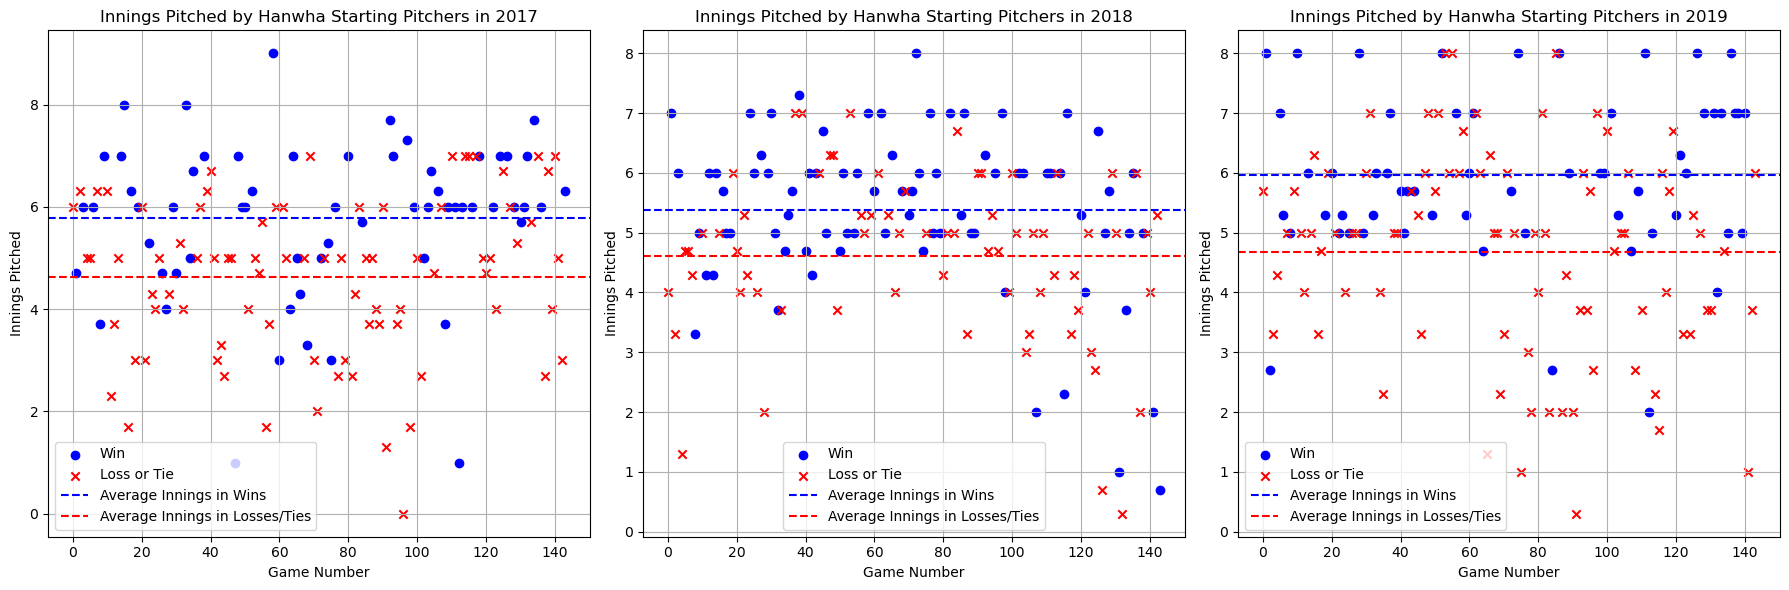

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# 예시 데이터와 함수 로드
# 여기에 실제 데이터와 필요한 라이브러리, 함수를 로드하세요

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, year in enumerate([2017, 2018, 2019]):
    # 한화가 이긴 경기와 그렇지 않은 경기를 구분
    match_data = globals()[f'HHMatch{year}']
    match_data['한화 승리'] = (match_data['원정'] == 'HH') & (match_data['원정점수'] > match_data['홈점수']) | \
                             (match_data['홈'] == 'HH') & (match_data['홈점수'] > match_data['원정점수'])

    # 한화가 이긴 경기
    winning_games = firstPitcher[year]['HH'][match_data['한화 승리']]
    # 문자열을 숫자로 변환
    winning_innings = pd.to_numeric(winning_games['이닝'], errors='coerce')
    axes[idx].scatter(winning_games.index, winning_innings, marker='o', color='blue', label='Win')
    # 평균 계산
    winning_average = winning_innings.mean() if not winning_innings.empty else 0
    
    # 한화가 지거나 비긴 경기
    losing_games = firstPitcher[year]['HH'][~match_data['한화 승리']]
    # 문자열을 숫자로 변환
    losing_innings = pd.to_numeric(losing_games['이닝'], errors='coerce')
    axes[idx].scatter(losing_games.index, losing_innings, marker='x', color='red', label='Loss or Tie')
    # 평균 계산
    losing_average = losing_innings.mean() if not losing_innings.empty else 0

    # 평균 이닝 가로선 그리기
    axes[idx].axhline(y=winning_average, color='blue', linestyle='--', label='Average Innings in Wins')
    axes[idx].axhline(y=losing_average, color='red', linestyle='--', label='Average Innings in Losses/Ties')

    # 그래프 제목 및 축 레이블 설정
    axes[idx].set_title(f'Innings Pitched by Hanwha Starting Pitchers in {year}')
    axes[idx].set_xlabel('Game Number')
    axes[idx].set_ylabel('Innings Pitched')
    axes[idx].grid(True)
    axes[idx].legend()

plt.tight_layout()
plt.show()


Year 2017:
  Mean Innings: 5.12
  Median (2nd Quartile): 5.0
  1st Quartile: 4.0
  3rd Quartile: 6.3
---------------
Year 2018:
  Mean Innings: 5.02
  Median (2nd Quartile): 5.0
  1st Quartile: 4.3
  3rd Quartile: 6.0
---------------
Year 2019:
  Mean Innings: 5.20
  Median (2nd Quartile): 5.3
  1st Quartile: 4.225
  3rd Quartile: 6.0
---------------


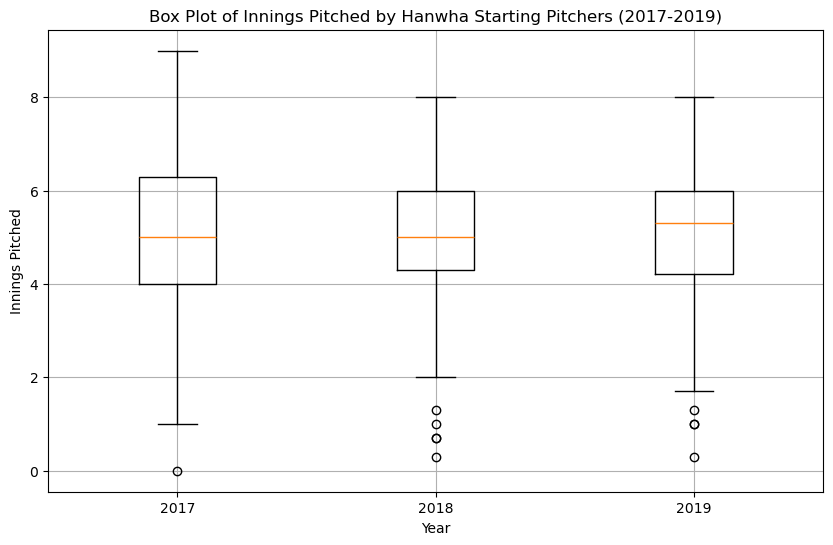

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 예시 데이터와 함수 로드
# 여기에 실제 데이터와 필요한 라이브러리, 함수를 로드하세요

# 각 연도별 이닝 데이터를 저장할 리스트
inning_data = []

for year in [2017, 2018, 2019]:
    # 해당 연도의 '한화' 선발투수 이닝 데이터 추출
    innings = firstPitcher[year]['HH']['이닝']
    # 문자열을 숫자로 변환하고, 변환할 수 없는 행은 제거
    innings_numeric = pd.to_numeric(innings, errors='coerce').dropna()
    inning_data.append(innings_numeric)

    # 평균, 중앙값, 1사분위수, 3사분위수 계산
    mean = np.mean(innings_numeric)
    median = np.median(innings_numeric)
    q1 = np.percentile(innings_numeric, 25)
    q3 = np.percentile(innings_numeric, 75)

    print(f"Year {year}:")
    print(f"  Mean Innings: {mean:.2f}")
    print(f"  Median (2nd Quartile): {median}")
    print(f"  1st Quartile: {q1}")
    print(f"  3rd Quartile: {q3}")
    print('---------------')

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(inning_data, labels=['2017', '2018', '2019'])

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot of Innings Pitched by Hanwha Starting Pitchers (2017-2019)')
plt.xlabel('Year')
plt.ylabel('Innings Pitched')

# 그래프 표시
plt.grid(True)
plt.show()


In [46]:
for year in [2019]:
    # 해당 연도의 '한화' 선발투수 이닝 데이터 추출
    innings = firstPitcher[year]['OB']['이닝']
    print(innings.shape)

(142,)


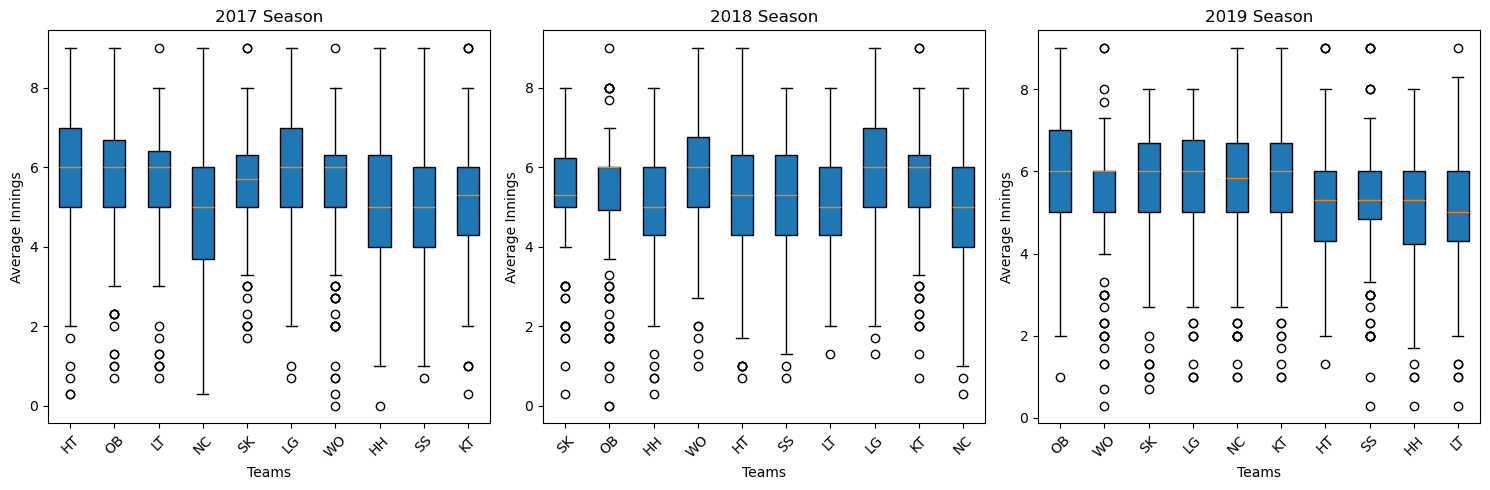

In [31]:
import matplotlib.pyplot as plt

# 연도별 팀 순위
rankings = {
    2017: ['HT', 'OB', 'LT', 'NC', 'SK', 'LG', 'WO', 'HH', 'SS', 'KT'],
    2018: ['SK', 'OB', 'HH', 'WO', 'HT', 'SS', 'LT', 'LG', 'KT', 'NC'],
    2019: ['OB', 'WO', 'SK', 'LG', 'NC', 'KT', 'HT', 'SS', 'HH', 'LT']
}

# 연도별로 박스 플롯을 위한 데이터 준비
boxplot_data = {year: [] for year in [2017, 2018, 2019]}
for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        team_data = firstPitcher[year][team_abbr]
        if '이닝' in team_data.columns:
            boxplot_data[year].append(team_data['이닝'].dropna().tolist())
        else:
            boxplot_data[year].append([])

# 연도별 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, year in enumerate([2017, 2018, 2019]):
    axes[idx].boxplot(boxplot_data[year], labels=rankings[year], patch_artist=True)
    axes[idx].set_title(f'{year} Season')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('Average Innings')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

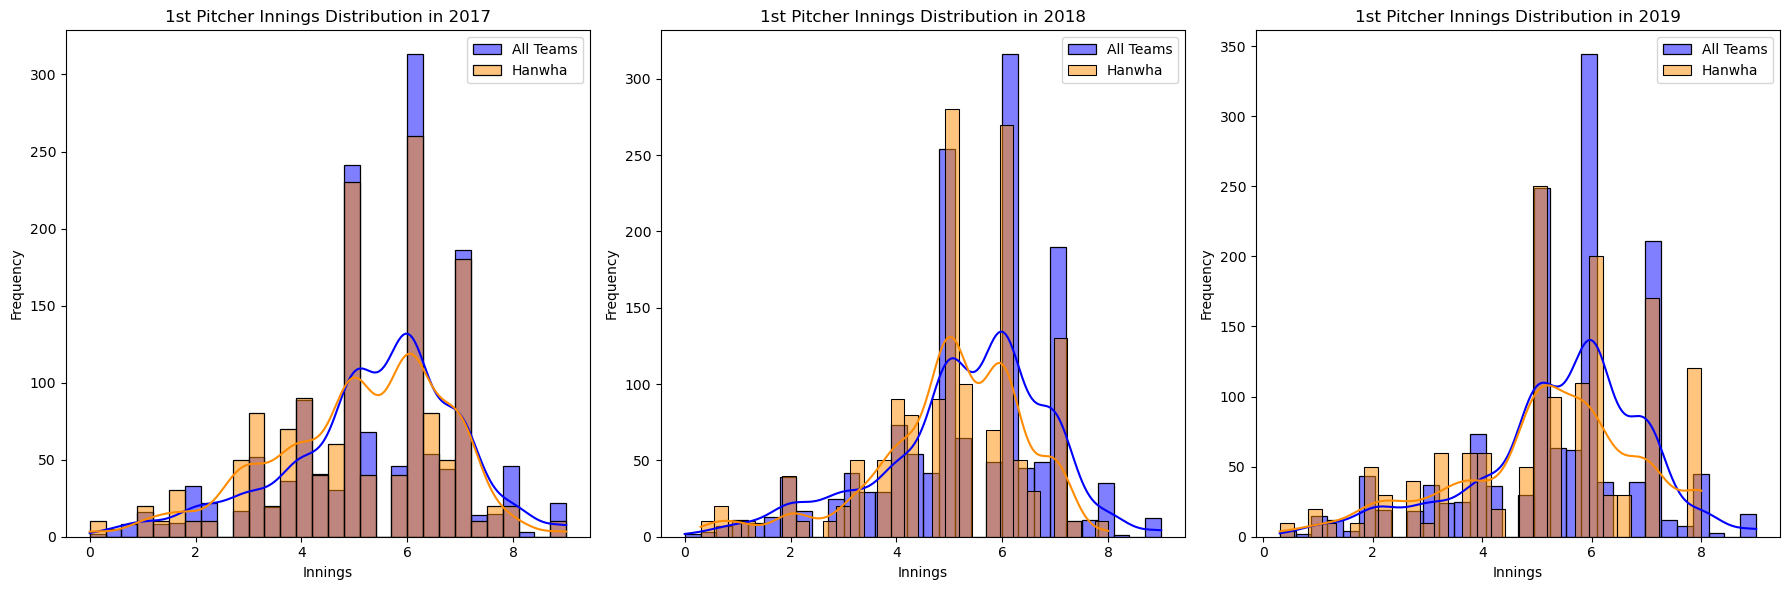

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1x3 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 연도별로 히스토그램과 KDE 그리기
for idx, year in enumerate([2017, 2018, 2019]):
    # 모든 팀의 이닝 데이터 수집
    all_innings = []
    hh_innings = []  # 한화 팀의 이닝 데이터
    for team_abbr in team_abbr_list:
        team_data = firstPitcher[year][team_abbr]
        if '이닝' in team_data.columns:
            innings = team_data['이닝'].dropna().tolist()
            all_innings.extend(innings)

            # 한화 팀 데이터 수집
            if team_abbr == 'HH':
                hh_innings.extend(innings)

    # 모든 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(all_innings, kde=True, bins=30, color="blue", ax=axes[idx], label="All Teams")
    
    # 한화 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(hh_innings*10, kde=True, bins=30, color="darkorange", ax=axes[idx], label="Hanwha")

    axes[idx].set_title(f'1st Pitcher Innings Distribution in {year}')
    axes[idx].set_xlabel('Innings')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

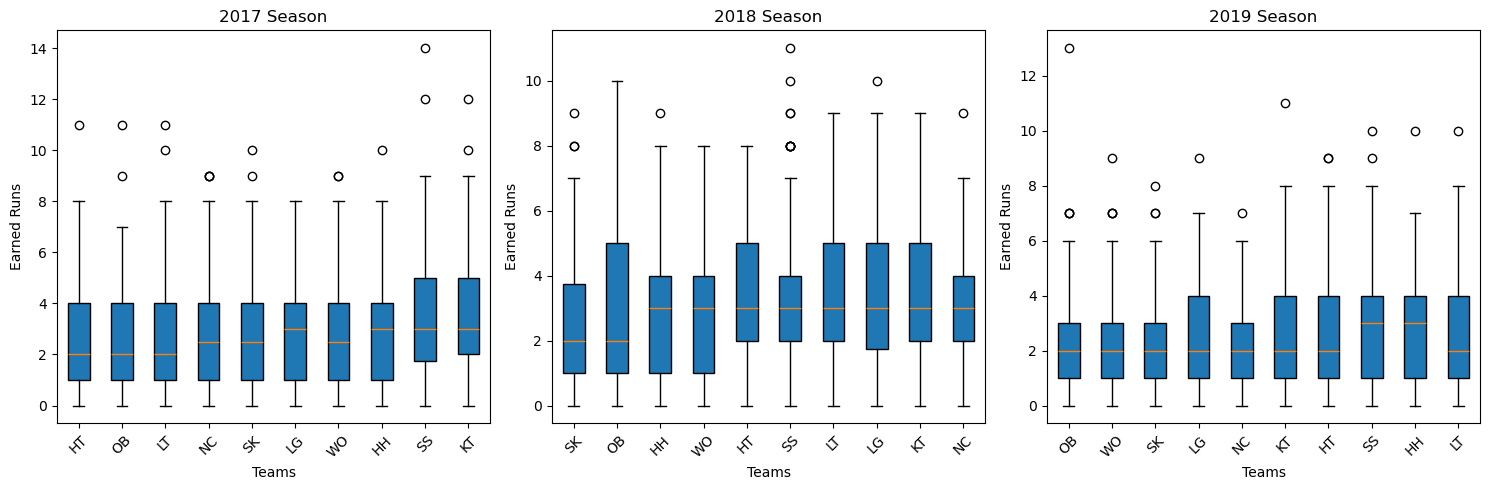

In [83]:
import matplotlib.pyplot as plt

# 연도별 팀 순위
rankings = {
    2017: ['HT', 'OB', 'LT', 'NC', 'SK', 'LG', 'WO', 'HH', 'SS', 'KT'],
    2018: ['SK', 'OB', 'HH', 'WO', 'HT', 'SS', 'LT', 'LG', 'KT', 'NC'],
    2019: ['OB', 'WO', 'SK', 'LG', 'NC', 'KT', 'HT', 'SS', 'HH', 'LT']
}

# 연도별로 박스 플롯을 위한 데이터 준비
boxplot_data = {year: [] for year in [2017, 2018, 2019]}
for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        team_data = firstPitcher[year][team_abbr]
        if '자책' in team_data.columns:
            boxplot_data[year].append(team_data['자책'].dropna().tolist())
        else:
            boxplot_data[year].append([])

# 연도별 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, year in enumerate([2017, 2018, 2019]):
    axes[idx].boxplot(boxplot_data[year], labels=rankings[year], patch_artist=True)
    axes[idx].set_title(f'{year} Season')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('Earned Runs')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

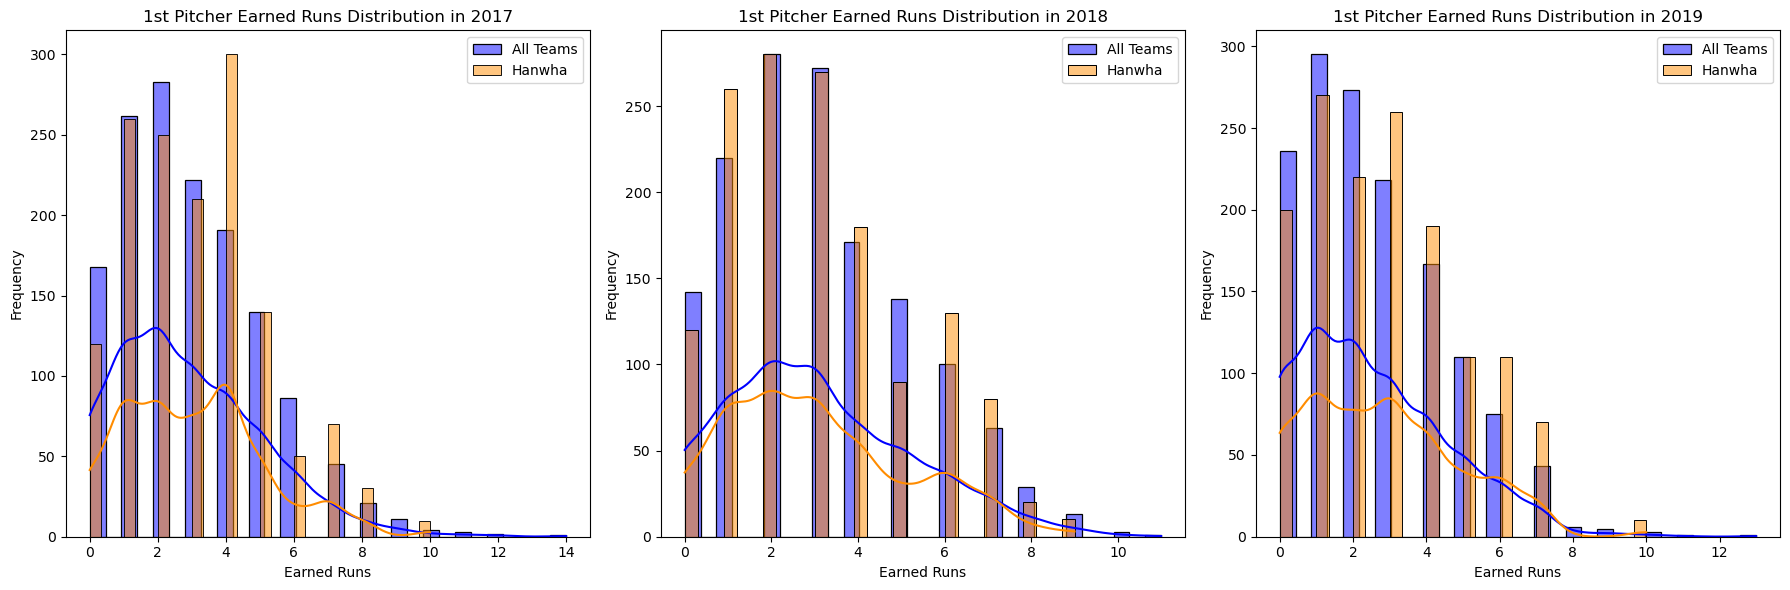

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, year in enumerate([2017, 2018, 2019]):
    # 모든 팀과 한화 팀의 자책점 데이터 수집
    all_earned_runs = []
    hh_earned_runs = []  # 한화 팀의 자책점 데이터
    for team_abbr in team_abbr_list:
        team_data = firstPitcher[year][team_abbr]
        if '자책' in team_data.columns:
            earned_runs = team_data['자책'].dropna().tolist()
            all_earned_runs.extend(earned_runs)

            # 한화 팀 데이터 수집
            if team_abbr == 'HH':
                hh_earned_runs.extend(earned_runs)

    # 모든 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(all_earned_runs, kde=True, bins=30, color="blue", ax=axes[idx], label="All Teams", common_norm=True)
    
    # 한화 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(hh_earned_runs*10, kde=True, bins=30, color="darkorange", ax=axes[idx], label="Hanwha", common_norm=True)

    axes[idx].set_title(f'1st Pitcher Earned Runs Distribution in {year}')
    axes[idx].set_xlabel('Earned Runs')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

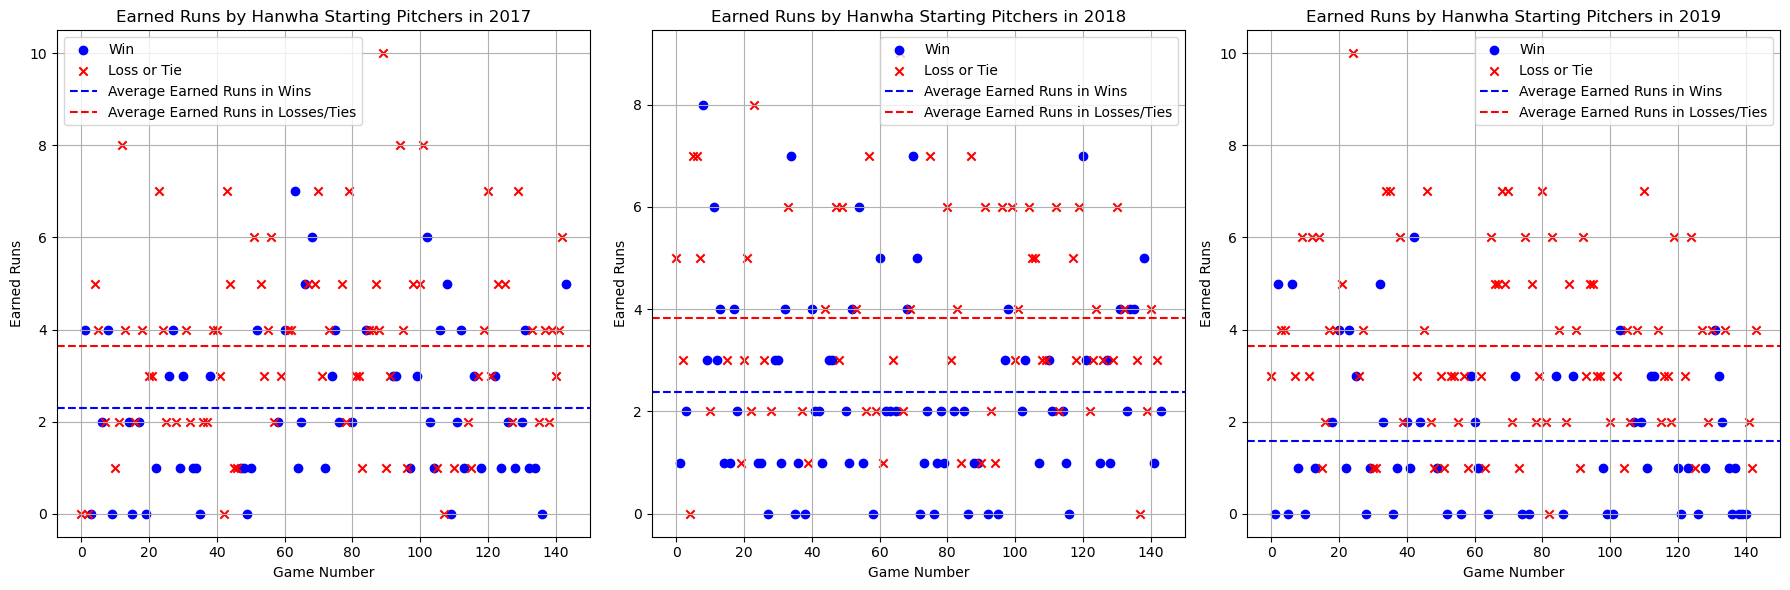

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, year in enumerate([2017, 2018, 2019]):
    # 한화가 이긴 경기와 그렇지 않은 경기를 구분
    match_data = globals()[f'HHMatch{year}']
    match_data['한화 승리'] = (match_data['원정'] == 'HH') & (match_data['원정점수'] > match_data['홈점수']) | \
                             (match_data['홈'] == 'HH') & (match_data['홈점수'] > match_data['원정점수'])

    # 한화가 이긴 경기
    winning_games = firstPitcher[year]['HH'][match_data['한화 승리']]
    axes[idx].scatter(winning_games.index, winning_games['자책'], marker='o', color='blue', label='Win')
    winning_average = winning_games['자책'].mean() if not winning_games.empty else 0

    # 한화가 지거나 비긴 경기
    losing_games = firstPitcher[year]['HH'][~match_data['한화 승리']]
    axes[idx].scatter(losing_games.index, losing_games['자책'], marker='x', color='red', label='Loss or Tie')
    losing_average = losing_games['자책'].mean() if not losing_games.empty else 0

    # 평균 자책점 가로선 그리기
    axes[idx].axhline(y=winning_average, color='blue', linestyle='--', label='Average Earned Runs in Wins')
    axes[idx].axhline(y=losing_average, color='red', linestyle='--', label='Average Earned Runs in Losses/Ties')

    # 그래프 제목 및 축 레이블 설정
    axes[idx].set_title(f'Earned Runs by Hanwha Starting Pitchers in {year}')
    axes[idx].set_xlabel('Game Number')
    axes[idx].set_ylabel('Earned Runs')
    axes[idx].grid(True)
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [129]:
print(pitcherDetailedRecords)

     name     id   birthday    연도    팀  나이  출장  완투  완봉  선발  ...  삼진  보크  폭투  \
0     황태환  10082 1952-08-06  1982   OB  30  27   2   0   6  ...  42   0   4   
1     황태환  10082 1952-08-06  1983   OB  31  39   0   0   2  ...  60   0   0   
2     황태환  10082 1952-08-06  1984   OB  32  17   0   0   3  ...  19   0   0   
3     황태환  10082 1952-08-06  1985   OB  33  35   1   1   6  ...  50   0   2   
4     황태환  10082 1952-08-06  1986   OB  34  28   0   0   1  ...  36   0   1   
...   ...    ...        ...   ...  ...  ..  ..  ..  ..  ..  ...  ..  ..  ..   
7168  김병준  99742 1977-04-01  2000   HH  23  22   0   0   2  ...  25   1   3   
7169  김병준  99742 1977-04-01  2001   HH  24  19   0   0   0  ...  21   1   1   
7170  김병준  99742 1977-04-01  2002   HH  25  15   0   0   2  ...  17   0   0   
7171  전하진  99767 1979-02-11  2000   HH  21   7   0   0   0  ...   8   0   0   
7172  비아노  99846 1973-09-04  1999  쌍방울  26  28   0   0   8  ...  37   1   3   

       ERA   FIP  WHIP   ERA+   FIP+   WAR  WPA  
0

In [146]:
temp = firstPitcher[2017]['KT']['투수명'].tolist()
print(temp)

# pitcherDetailedRecords 데이터프레임 중 2017년도의 KT 팀 데이터를 조회
kt_2017_data = pitcherDetailedRecords[
    (pitcherDetailedRecords['연도'] == 2017) & (pitcherDetailedRecords['팀'] == 'KT')
]

kt_2017_data

['로치', '정대현', '피어밴드', '주권', '고영표', '로치', '정대현', '피어밴드', '주권', '고영표', '로치', '정대현', '피어밴드', '주권', '고영표', '로치', '정대현', '피어밴드', '정성곤', '고영표', '로치', '정대현', '피어밴드', '정성곤', '고영표', '로치', '정대현', '피어밴드', '류희운', '정성곤', '로치', '고영표', '정대현', '피어밴드', '주권', '로치', '고영표', '정성곤', '피어밴드', '주권', '로치', '고영표', '정성곤', '김사율', '피어밴드', '로치', '정대현', '고영표', '홍성용', '주권', '정성곤', '류희운', '고영표', '김사율', '피어밴드', '주권', '로치', '고영표', '피어밴드', '주권', '정성곤', '로치', '고영표', '피어밴드', '주권', '정성곤', '김사율', '고영표', '피어밴드', '류희운', '정성곤', '배제성', '로치', '피어밴드', '고영표', '류희운', '정성곤', '로치', '피어밴드', '고영표', '로치', '피어밴드', '고영표', '로치', '피어밴드', '고영표', '정성곤', '로치', '류희운', '피어밴드', '고영표', '정성곤', '로치', '류희운', '피어밴드', '고영표', '정성곤', '류희운', '로치', '피어밴드', '고영표', '김사율', '류희운', '주권', '로치', '고영표', '피어밴드', '정성곤', '로치', '주권', '고영표', '피어밴드', '류희운', '로치', '정성곤', '심재민', '피어밴드', '고영표', '류희운', '로치', '정성곤', '피어밴드', '고영표', '박세진', '로치', '류희운', '피어밴드', '정성곤', '박세진', '로치', '류희운', '피어밴드', '정성곤', '박세진', '로치', '류희운', '정성곤', '심재민', '로치', '류희운', '정성곤', '로치', '김사율', '주권']


,name,id,birthday,연도,팀,나이,출장,완투,완봉,선발,...,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR,WPA


In [130]:
print(pitcherRecords)

       이름     id    연도      팀명 평균자책점  경기  완투  완봉  승리  패배  ...     승률  타자수  \
0     황태환  10082  1982  OB      3.86  27   2   0   6   5  ...  0.545  365   
1     황태환  10082  1983  OB      2.65  39   0   0   6   6  ...  0.500  449   
2     황태환  10082  1984  OB      2.48  17   0   0   0   2  ...  0.000  159   
3     황태환  10082  1985      OB  3.53  35   1   1   4   8  ...  0.333  402   
4     황태환  10082  1986      OB  2.45  28   0   0   3   3  ...  0.500  300   
...   ...    ...   ...     ...   ...  ..  ..  ..  ..  ..  ...    ...  ...   
7098  김병준  99742  2000      HH  5.67  22   0   0   0   1  ...  0.000  191   
7099  김병준  99742  2001      HH  2.93  19   0   0   1   0  ...  1.000  147   
7100  김병준  99742  2002      HH  6.15  15   0   0   1   1  ...  0.500  119   
7101  전하진  99767  2000      HH  6.17   7   0   0   0   0  ...      -   54   
7102  비아노  99846  1999     쌍방울  7.06  28   0   0   3   3  ...  0.500  346   

         이닝  피안타 피홈런  볼넷  사구  삼진  실점  자책점  
0      86.3   76  12  37  11  4

In [124]:
print(firstPitcher[2017]['HH'])

     Unnamed: 0    투수명   이닝  피안타  실점  자책  4사구  삼진  피홈런  타자  ...  세이브   평균자책  \
0          3979  비야누에바  6.0    1   2   0    2   6    0  22  ...  0.0   0.00   
1          4027    오간도  4.7    5   4   4    2   4    1  22  ...  0.0   7.71   
2          4074    송은범  6.3    3   0   0    3   1    0  23  ...  0.0   0.00   
3          4119    배영수  6.0    3   0   0    2   5    0  24  ...  0.0   0.00   
4          4155    오간도  5.0    8   5   5    3   5    0  25  ...  0.0   8.38   
..          ...    ...  ...  ...  ..  ..  ...  ..  ...  ..  ...  ...    ...   
139        5864    안영명  4.0    9   4   4    1   2    0  22  ...  0.0   5.75   
140        5898    김재영  7.0    5   4   3    1   7    1  28  ...  0.0   4.54   
141        5932    배영수  5.0    5   4   4    5   4    1  25  ...  0.0   5.06   
142        5971    김민우  3.0    8   6   6    2   2    1  18  ...  0.0  17.18   
143        5767    윤규진  6.3    9   5   5    0   5    2  28  ...  0.0   5.22   

       연도   월   일  소속팀  상대팀  경기장            matchid

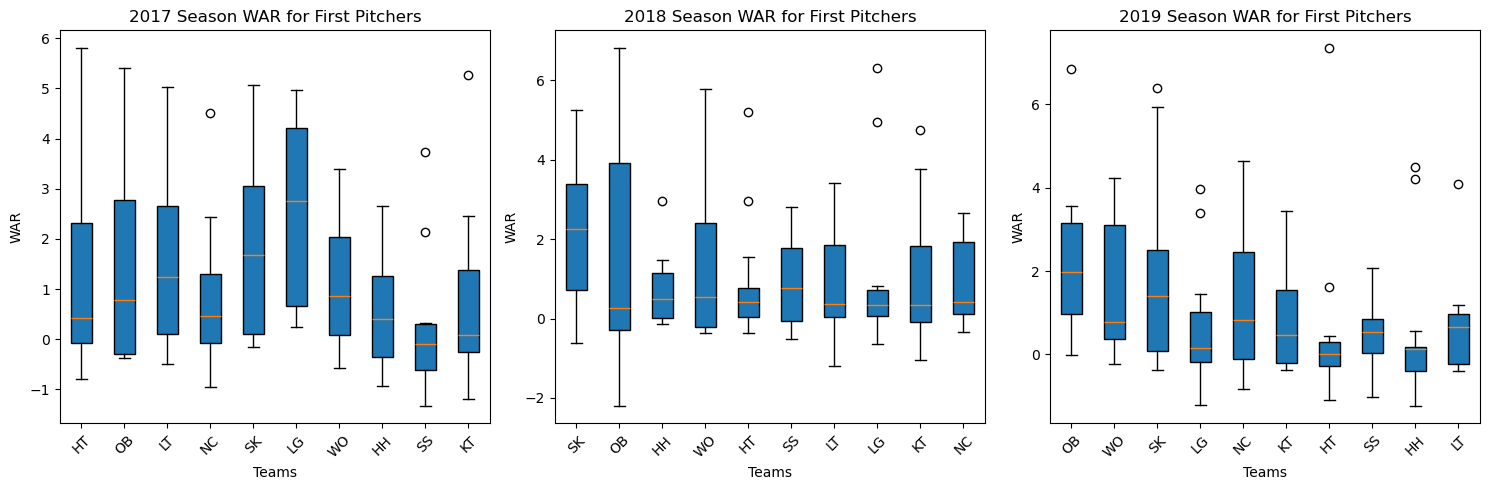

In [29]:
rankings = {
    2017: ['HT', 'OB', 'LT', 'NC', 'SK', 'LG', 'WO', 'HH', 'SS', 'KT'],
    2018: ['SK', 'OB', 'HH', 'WO', 'HT', 'SS', 'LT', 'LG', 'KT', 'NC'],
    2019: ['OB', 'WO', 'SK', 'LG', 'NC', 'KT', 'HT', 'SS', 'HH', 'LT']
}

# Function definition to plot WAR boxplot for each year.
def plot_war_boxplots(year, firstPitcher, pitcherDetailedRecords, rankings):
    # Extract the teams in the order of their ranking for the given year.
    ranked_teams = rankings[year]

    # Retrieve the WAR values for the first pitchers of the ranked teams.
    war_values = []
    for team in ranked_teams:
        # Get the names of the first pitchers for the team and year.
        pitchers_names = firstPitcher[year][team]['투수명'].tolist()
        # Get the WAR values for these pitchers from the detailed records.
        war_data = pitcherDetailedRecords[
            (pitcherDetailedRecords['연도'] == year) &
            (pitcherDetailedRecords['팀'] == team) &
            (pitcherDetailedRecords['name'].isin(pitchers_names))
        ]['ERA+'].tolist()
        war_values.append(war_data)

    # Plot the boxplot.
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=war_values)
    plt.xticks(range(len(ranked_teams)), ranked_teams)
    plt.title(f'Boxplot of WAR for First Pitchers in {year}')
    plt.xlabel('Teams Ordered by Ranking')
    plt.ylabel('ERA+')
    plt.show()

# 연도별로 WAR 박스 플롯을 위한 데이터 준비
war_boxplot_data = {year: [] for year in [2017, 2018, 2019]}
for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        # 각 팀의 선발 투수 명단을 가져옴
        team_pitchers = firstPitcher[year].get(team_abbr)
        if team_pitchers is not None:
            # 해당 팀의 선발 투수들의 WAR 정보를 가져옴
            team_war_values = pitcherDetailedRecords.loc[
                (pitcherDetailedRecords['연도'] == year) &
                (pitcherDetailedRecords['팀'] == team_abbr) &
                (pitcherDetailedRecords['name'].isin(team_pitchers['투수명']))
            ]['WAR']
            war_boxplot_data[year].append(team_war_values)
        else:
            # 해당 팀의 데이터가 없을 경우 빈 리스트 추가
            war_boxplot_data[year].append([])

# 연도별 WAR 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, year in enumerate([2017, 2018, 2019]):
    # 박스플롯의 patch_artist=True 옵션을 사용하여 박스의 색을 채움
    bp = axes[idx].boxplot(war_boxplot_data[year], labels=rankings[year], patch_artist=True)

    # # 박스의 색상과 테두리 색상 설정
    # for patch in bp['boxes']:
    #     patch.set_facecolor('lightblue')
    #     patch.set_edgecolor('blue')

    # 박스플롯의 타이틀, 라벨 등 설정
    axes[idx].set_title(f'{year} Season WAR for First Pitchers')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('WAR')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Year 2017:
  Mean WAR: 0.55
  Median (2nd Quartile): 0.35
  1st Quartile: -0.05
  3rd Quartile: 1.02
---------------
Year 2018:
  Mean WAR: 0.74
  Median (2nd Quartile): 0.2
  1st Quartile: -0.005000000000000001
  3rd Quartile: 1.29
---------------
Year 2019:
  Mean WAR: 0.47
  Median (2nd Quartile): 0.04
  1st Quartile: -0.16
  3rd Quartile: 0.505
---------------


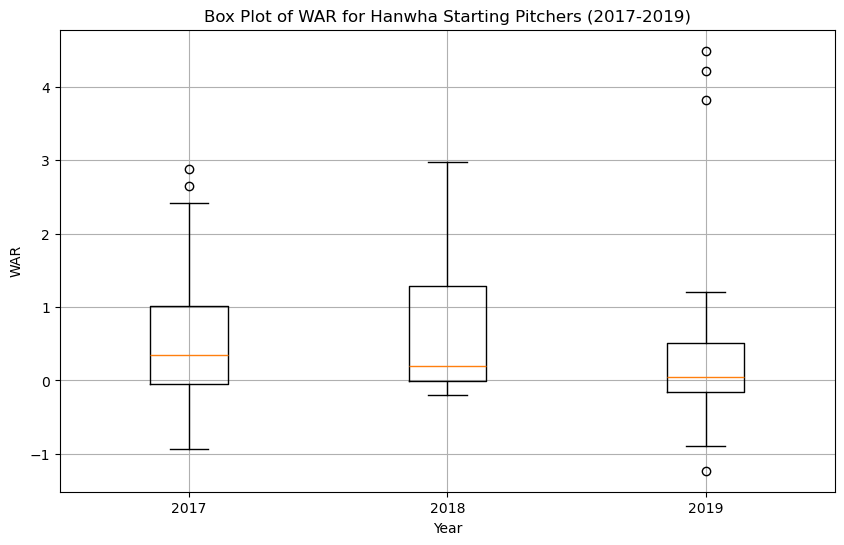

(None,
 [(0.5524, 0.35, -0.05, 1.02),
  (0.7377777777777779, 0.2, -0.005000000000000001, 1.29),
  (0.472962962962963, 0.04, -0.16, 0.505)])

In [153]:
# 각 연도별 WAR 데이터를 저장할 리스트
war_data = []
summaries = []

for year in [2017, 2018, 2019]:
    # 해당 연도의 '한화' 선발투수 WAR 데이터 추출
    war = pitcherDetailedRecords[(pitcherDetailedRecords['연도'] == year) & (pitcherDetailedRecords['팀'] == 'HH')]['WAR']
    war_data.append(war)

    # 평균, 중앙값, 1사분위수, 3사분위수 계산
    mean = np.mean(war)
    median = np.median(war)
    q1 = np.percentile(war, 25)
    q3 = np.percentile(war, 75)
    
    summaries.append((mean, median, q1, q3))

    print(f"Year {year}:")
    print(f"  Mean WAR: {mean:.2f}")
    print(f"  Median (2nd Quartile): {median}")
    print(f"  1st Quartile: {q1}")
    print(f"  3rd Quartile: {q3}")
    print('---------------')

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(war_data, labels=['2017', '2018', '2019'])

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot of WAR for Hanwha Starting Pitchers (2017-2019)')
plt.xlabel('Year')
plt.ylabel('WAR')

# 그래프 표시
plt.grid(True)
plt.show(), summaries

/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

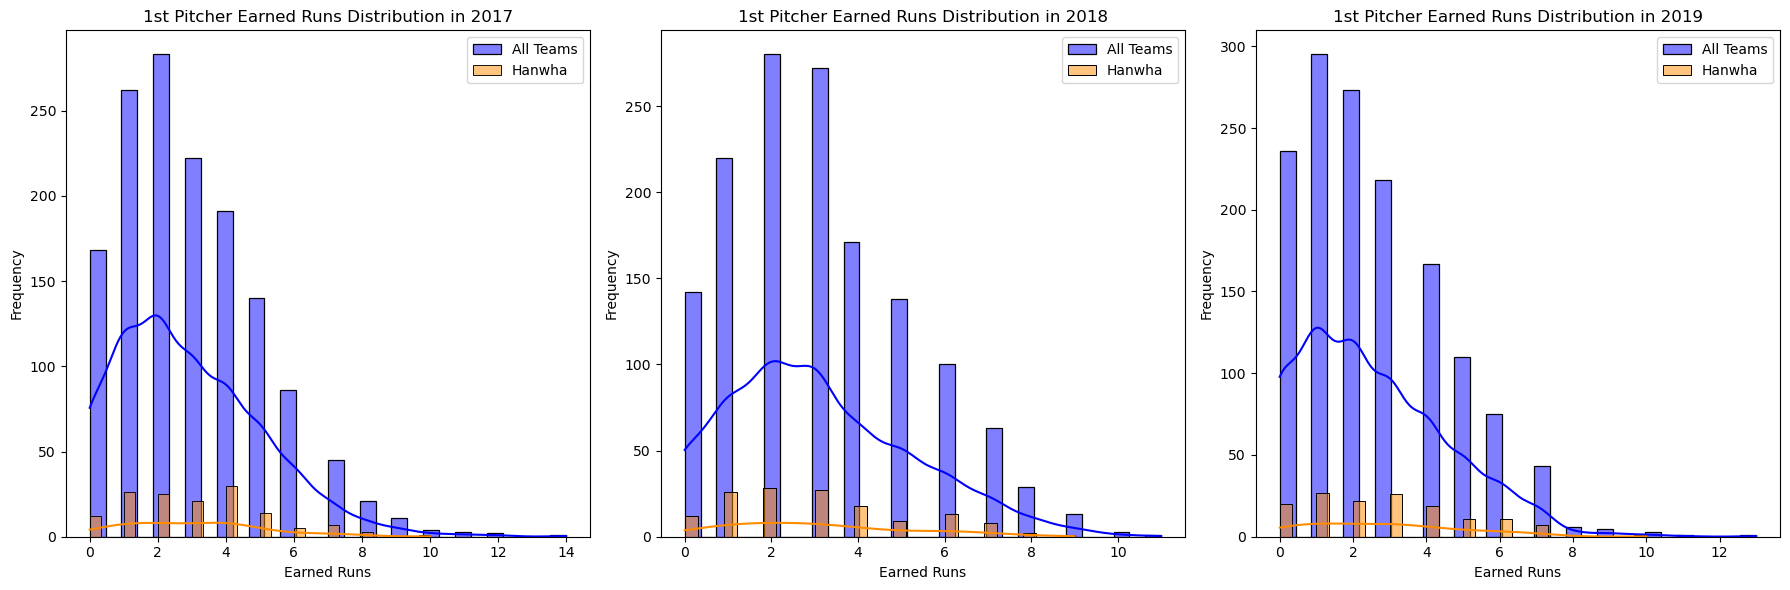

In [140]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, year in enumerate([2017, 2018, 2019]):
    # 모든 팀과 한화 팀의 자책점 데이터 수집
    all_earned_runs = []
    hh_earned_runs = []  # 한화 팀의 자책점 데이터
    for team_abbr in team_abbr_list:
        team_data = firstPitcher[year][team_abbr]
        if '자책' in team_data.columns:
            earned_runs = team_data['자책'].dropna().tolist()
            all_earned_runs.extend(earned_runs)

            # 한화 팀 데이터 수집
            if team_abbr == 'HH':
                hh_earned_runs.extend(earned_runs)

    # 모든 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(all_earned_runs, kde=True, bins=30, color="blue", ax=axes[idx], label="All Teams", common_norm=True)
    
    # 한화 팀에 대한 히스토그램과 KDE 그리기
    # 수정: 한화 팀 데이터를 10배 증가시켜 KDE 계산
    sns.histplot(hh_earned_runs, kde=True, bins=30, color="darkorange", ax=axes[idx], label="Hanwha", common_norm=True)

    axes[idx].set_title(f'1st Pitcher Earned Runs Distribution in {year}')
    axes[idx].set_xlabel('Earned Runs')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

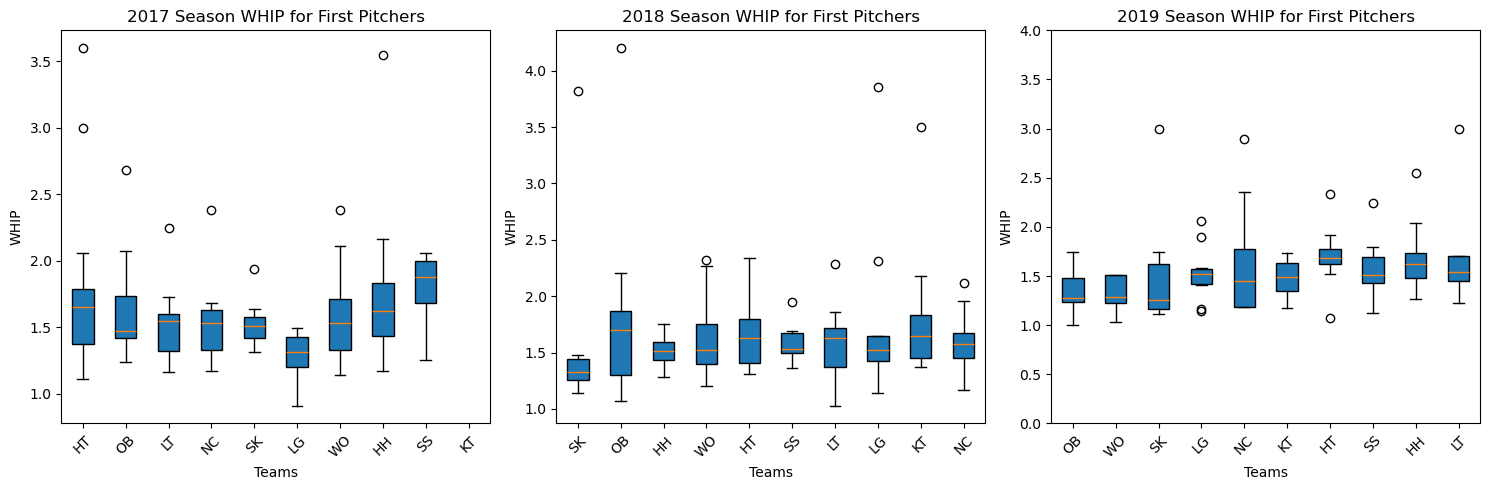

In [176]:
rankings = {
    2017: ['HT', 'OB', 'LT', 'NC', 'SK', 'LG', 'WO', 'HH', 'SS', 'KT'],
    2018: ['SK', 'OB', 'HH', 'WO', 'HT', 'SS', 'LT', 'LG', 'KT', 'NC'],
    2019: ['OB', 'WO', 'SK', 'LG', 'NC', 'KT', 'HT', 'SS', 'HH', 'LT']
}

# Function definition to plot WAR boxplot for each year.
def plot_war_boxplots(year, firstPitcher, pitcherDetailedRecords, rankings):
    # Extract the teams in the order of their ranking for the given year.
    ranked_teams = rankings[year]

    # Retrieve the WAR values for the first pitchers of the ranked teams.
    war_values = []
    for team in ranked_teams:
        # Get the names of the first pitchers for the team and year.
        pitchers_names = firstPitcher[year][team]['투수명'].tolist()
        # Get the WAR values for these pitchers from the detailed records.
        war_data = pitcherDetailedRecords[
            (pitcherDetailedRecords['연도'] == year) &
            (pitcherDetailedRecords['팀'] == team) &
            (pitcherDetailedRecords['name'].isin(pitchers_names))
        ]['WAR'].tolist()
        war_values.append(war_data)

    # Plot the boxplot.
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=war_values)
    plt.xticks(range(len(ranked_teams)), ranked_teams)
    plt.title(f'Boxplot of WHIP for First Pitchers in {year}')
    plt.xlabel('Teams Ordered by Ranking')
    plt.ylabel('WHIP')
    plt.show()

# 연도별로 WAR 박스 플롯을 위한 데이터 준비
war_boxplot_data = {year: [] for year in [2017, 2018, 2019]}
for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        # 각 팀의 선발 투수 명단을 가져옴
        team_pitchers = firstPitcher[year].get(team_abbr)
        if team_pitchers is not None:
            # 해당 팀의 선발 투수들의 WAR 정보를 가져옴
            team_war_values = pitcherDetailedRecords.loc[
                (pitcherDetailedRecords['연도'] == year) &
                (pitcherDetailedRecords['팀'] == team_abbr) &
                (pitcherDetailedRecords['name'].isin(team_pitchers['투수명']))
            ]['WHIP']
            war_boxplot_data[year].append(team_war_values)
        else:
            # 해당 팀의 데이터가 없을 경우 빈 리스트 추가
            war_boxplot_data[year].append([])

# 연도별 WAR 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.ylim(0, 4)
for idx, year in enumerate([2017, 2018, 2019]):
    # 박스플롯의 patch_artist=True 옵션을 사용하여 박스의 색을 채움
    bp = axes[idx].boxplot(war_boxplot_data[year], labels=rankings[year], patch_artist=True)

    # # 박스의 색상과 테두리 색상 설정
    # for patch in bp['boxes']:
    #     patch.set_facecolor('lightblue')
    #     patch.set_edgecolor('blue')

    # 박스플롯의 타이틀, 라벨 등 설정
    axes[idx].set_title(f'{year} Season WHIP for First Pitchers')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('WHIP')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Year 2017:
  Mean ERA+: 106.44
  Median (2nd Quartile): 99.3
  1st Quartile: 75.9
  3rd Quartile: 120.5
---------------
Year 2018:
  Mean ERA+: 112.08
  Median (2nd Quartile): 98.1
  1st Quartile: 82.30000000000001
  3rd Quartile: 122.35
---------------
Year 2019:
  Mean ERA+: 81.71
  Median (2nd Quartile): 78.44999999999999
  1st Quartile: 61.4
  3rd Quartile: 102.05
---------------


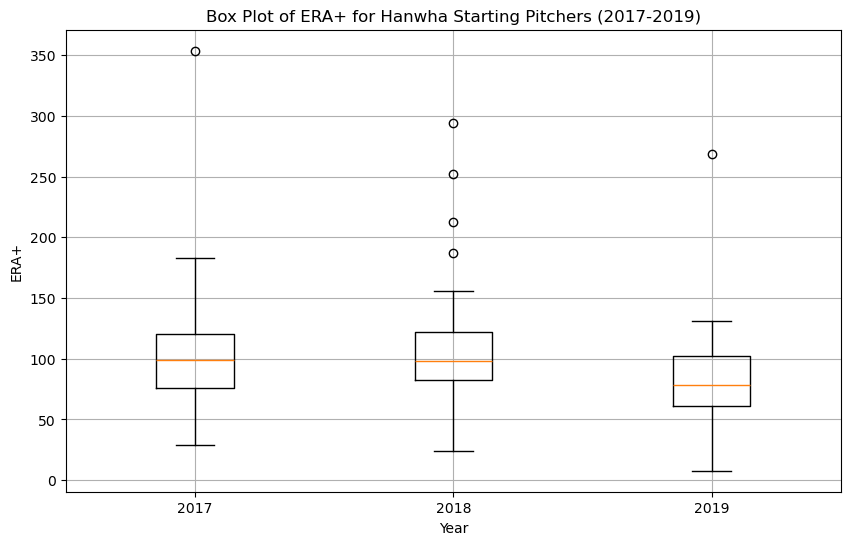

(None,
 [(106.44399999999997, 99.3, 75.9, 120.5),
  (112.08148148148149, 98.1, 82.30000000000001, 122.35),
  (81.70769230769233, 78.44999999999999, 61.4, 102.05)])

In [53]:
# 각 연도별 WAR 데이터를 저장할 리스트
war_data = []
summaries = []

for year in [2017, 2018, 2019]:
    # 해당 연도의 '한화' 선발투수 WAR 데이터 추출
    war = pitcherDetailedRecords[(pitcherDetailedRecords['연도'] == year) & (pitcherDetailedRecords['팀'] == 'HH')]['ERA+']

    # NaN 값 제거
    war = war.dropna()
    war_data.append(war)

    # 평균, 중앙값, 1사분위수, 3사분위수 계산
    mean = np.mean(war)
    median = np.median(war)
    q1 = np.percentile(war, 25)
    q3 = np.percentile(war, 75)
    
    summaries.append((mean, median, q1, q3))

    print(f"Year {year}:")
    print(f"  Mean ERA+: {mean:.2f}")
    print(f"  Median (2nd Quartile): {median}")
    print(f"  1st Quartile: {q1}")
    print(f"  3rd Quartile: {q3}")
    print('---------------')
    

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(war_data, labels=['2017', '2018', '2019'])

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot of ERA+ for Hanwha Starting Pitchers (2017-2019)')
plt.xlabel('Year')
plt.ylabel('ERA+')
# plt.ylim(0, 5)

# 그래프 표시
plt.grid(True)
plt.show(), summaries

/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

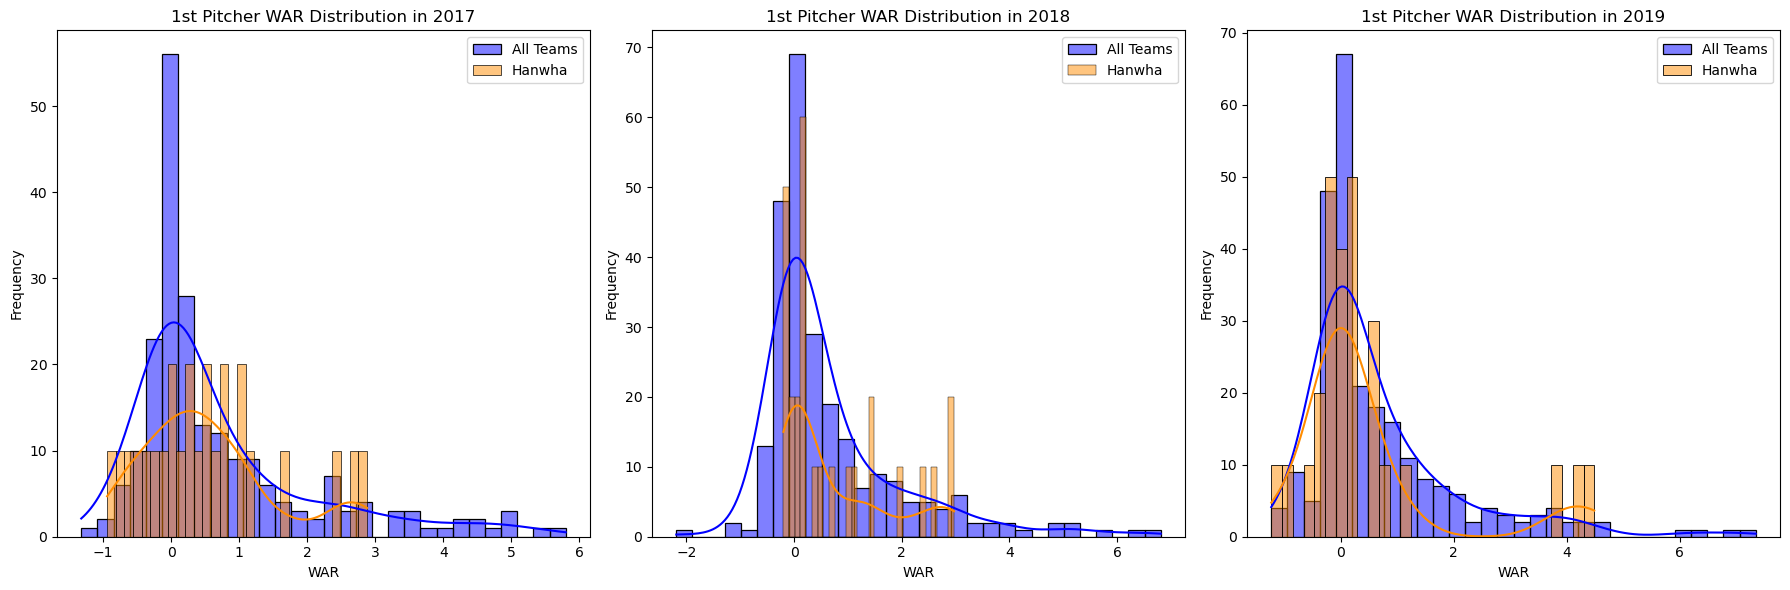

In [162]:
# 각 연도별 ERA+ 데이터를 수집하고 히스토그램 및 KDE 그래프 생성

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, year in enumerate([2017, 2018, 2019]):
    # 모든 팀과 한화 팀의 ERA+ 데이터 수집
    all_era_plus = []
    hh_era_plus = []  # 한화 팀의 ERA+ 데이터
    for team_abbr in team_abbr_list:
        team_data = pitcherDetailedRecords[(pitcherDetailedRecords['연도'] == year) & (pitcherDetailedRecords['팀'] == team_abbr)]
        if 'ERA+' in team_data.columns:
            era_plus = team_data['WAR'].dropna().tolist()
            all_era_plus.extend(era_plus)

            # 한화 팀 데이터 수집
            if team_abbr == 'HH':
                hh_era_plus.extend(era_plus)

    # 모든 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(all_era_plus, kde=True, bins=30, color="blue", ax=axes[idx], label="All Teams", common_norm=True)
    
    # 한화 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(hh_era_plus*10, kde=True, bins=30, color="darkorange", ax=axes[idx], label="Hanwha", common_norm=True)

    axes[idx].set_title(f'1st Pitcher WAR Distribution in {year}')
    axes[idx].set_xlabel('WAR')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

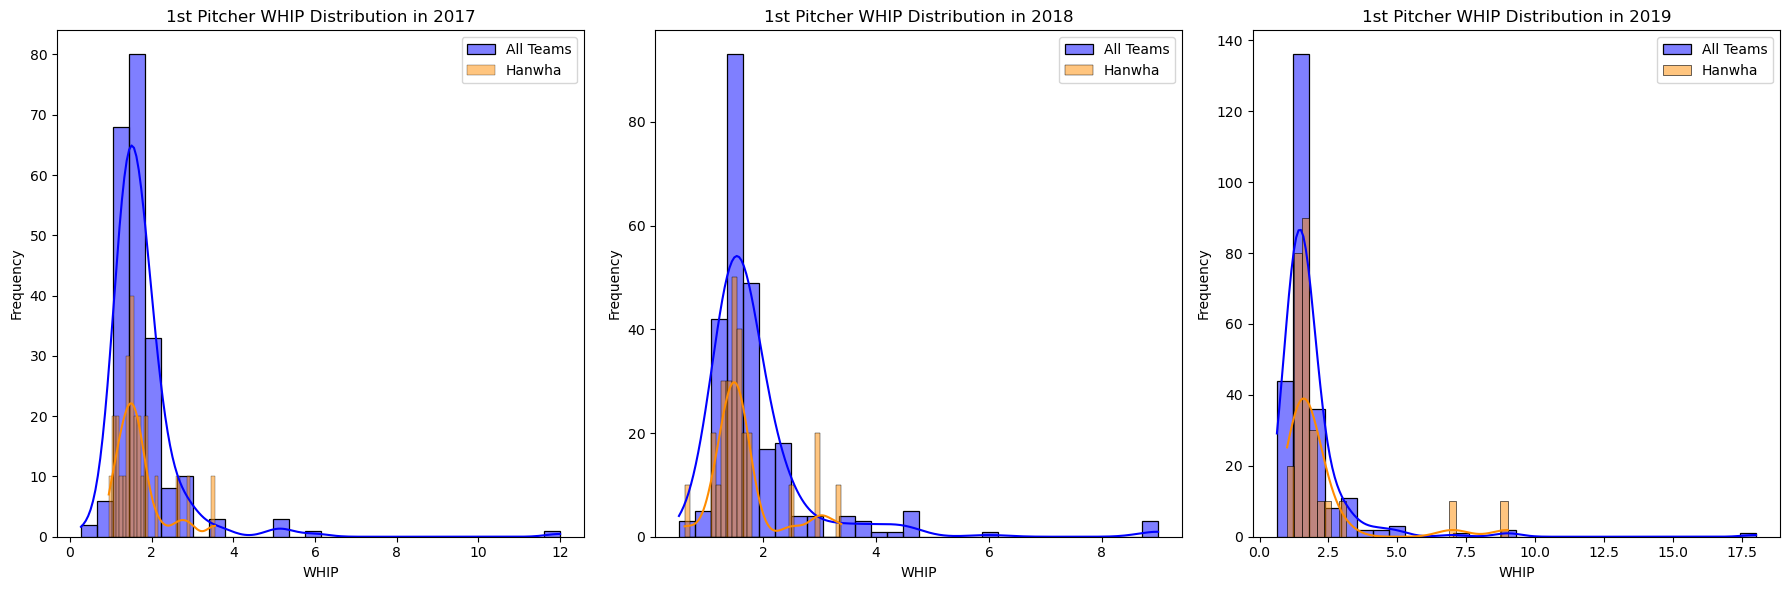

In [177]:
# 각 연도별 ERA+ 데이터를 수집하고 히스토그램 및 KDE 그래프 생성

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, year in enumerate([2017, 2018, 2019]):
    # 모든 팀과 한화 팀의 ERA+ 데이터 수집
    all_era_plus = []
    hh_era_plus = []  # 한화 팀의 ERA+ 데이터
    for team_abbr in team_abbr_list:
        team_data = pitcherDetailedRecords[(pitcherDetailedRecords['연도'] == year) & (pitcherDetailedRecords['팀'] == team_abbr)]
        if 'ERA+' in team_data.columns:
            era_plus = team_data['WHIP'].dropna().tolist()
            all_era_plus.extend(era_plus)

            # 한화 팀 데이터 수집
            if team_abbr == 'HH':
                hh_era_plus.extend(era_plus)

    # 모든 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(all_era_plus, kde=True, bins=30, color="blue", ax=axes[idx], label="All Teams", common_norm=True)
    
    # 한화 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(hh_era_plus*10, kde=True, bins=30, color="darkorange", ax=axes[idx], label="Hanwha", common_norm=True)

    axes[idx].set_title(f'1st Pitcher WHIP Distribution in {year}')
    axes[idx].set_xlabel('WHIP')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

#### B. 중계투수 관련 분석

#### B0. 데이터 준비

In [54]:
# 각 연도별 중계투수 데이터를 저장할 딕셔너리
reliefPitcher = {
    2017: {team_abbr: pd.DataFrame() for team_abbr in team_abbr_list},
    2018: {team_abbr: pd.DataFrame() for team_abbr in team_abbr_list},
    2019: {team_abbr: pd.DataFrame() for team_abbr in team_abbr_list}
}

# 각 팀의 중계투수 데이터 추출
for year in [2017, 2018, 2019]:
    for team_abbr in team_abbr_list:
        match_data = globals()[f'{team_abbr}Match{year}']
        for _, row in match_data.iterrows():
            matchid = row['matchID']
            team_part = matchid[8:]
            away_team = team_part[:2]

            if away_team == team_abbr:
                team_pitchers = globals()[f'pitcher{year}'][(globals()[f'pitcher{year}']['matchid'] == matchid) & (globals()[f'pitcher{year}']['경기장'] == '원정')]
            else:
                team_pitchers = globals()[f'pitcher{year}'][(globals()[f'pitcher{year}']['matchid'] == matchid) & (globals()[f'pitcher{year}']['경기장'] == '홈')]

            # 첫 번째 시작 투수를 제외한 투수들의 데이터 추가
            if not team_pitchers.empty and len(team_pitchers) > 1:
                relief_pitchers = team_pitchers.iloc[1:]
                reliefPitcher[year][team_abbr] = pd.concat([reliefPitcher[year][team_abbr], relief_pitchers], ignore_index=True)

# 결과 확인
print(reliefPitcher[2018]['HH'].head())

   Unnamed: 0  투수명   이닝  피안타  실점  자책  4사구  삼진  피홈런  타자  ...   패전  세이브  평균자책  \
0        4233  김범수  0 ⅔    1   0   0    0   1    0   3  ...  0.0  0.0   0.0   
1        4234  심수창  0 ⅔    2   0   0    0   0    0   4  ...  0.0  0.0   0.0   
2        4235  박주홍  0 ⅔    0   0   0    0   0    0   2  ...  0.0  0.0   0.0   
3        4236  송은범  0 ⅔    1   0   0    0   0    0   3  ...  0.0  0.0   0.0   
4        4237   서균    1    0   0   0    0   0    0   3  ...  0.0  0.0   0.0   

     연도  월   일  소속팀  상대팀  경기장            matchid  
0  2018  3  24   WO   HH   원정  20180324HHWO02018  
1  2018  3  24   WO   HH   원정  20180324HHWO02018  
2  2018  3  24   WO   HH   원정  20180324HHWO02018  
3  2018  3  24   WO   HH   원정  20180324HHWO02018  
4  2018  3  24   WO   HH   원정  20180324HHWO02018  

[5 rows x 24 columns]


#### B1. WHIP

Year 2017:
  Mean WHIP: 1.82
  Median (2nd Quartile): 1.61
  1st Quartile: 1.41
  3rd Quartile: 1.94
---------------
Year 2018:
  Mean WHIP: 1.88
  Median (2nd Quartile): 1.58
  1st Quartile: 1.41
  3rd Quartile: 1.95
---------------
Year 2019:
  Mean WHIP: 1.75
  Median (2nd Quartile): 1.5150000000000001
  1st Quartile: 1.29
  3rd Quartile: 1.84
---------------


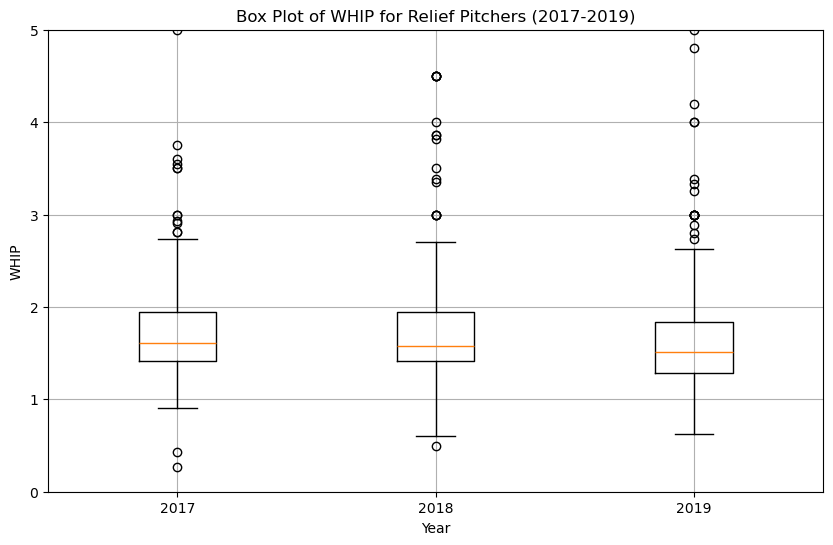

(None,
 [(1.8197235023041474, 1.61, 1.41, 1.94),
  (1.8844292237442926, 1.58, 1.41, 1.95),
  (1.7497087378640774, 1.5150000000000001, 1.29, 1.84)])

In [66]:
# 각 연도별 중계투수의 WHIP 데이터를 저장할 리스트
whip_data = []
summaries = []

for year in [2017, 2018, 2019]:
    # 해당 연도의 모든 팀의 중계투수 이름 가져오기
    relief_pitchers = []
    for team_abbr in team_abbr_list:
        relief_pitchers.extend(reliefPitcher[year][team_abbr]['투수명'].dropna().tolist())

    # 중계투수들의 WHIP 데이터 가져오기
    whip = pitcherDetailedRecords[
        (pitcherDetailedRecords['연도'] == year) & 
        (pitcherDetailedRecords['name'].isin(relief_pitchers))
    ]['WHIP']

    # NaN 값 제거
    whip = whip.dropna()
    whip_data.append(whip)

    # 평균, 중앙값, 1사분위수, 3사분위수 계산
    mean = np.mean(whip)
    median = np.median(whip)
    q1 = np.percentile(whip, 25)
    q3 = np.percentile(whip, 75)
    
    summaries.append((mean, median, q1, q3))

    print(f"Year {year}:")
    print(f"  Mean WHIP: {mean:.2f}")
    print(f"  Median (2nd Quartile): {median}")
    print(f"  1st Quartile: {q1}")
    print(f"  3rd Quartile: {q3}")
    print('---------------')

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(whip_data, labels=['2017', '2018', '2019'])

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot of WHIP for Relief Pitchers (2017-2019)')
plt.xlabel('Year')
plt.ylabel('WHIP')
plt.ylim(0, 5)  # WHIP 값의 범위 설정

# 그래프 표시
plt.grid(True)
plt.show(), summaries

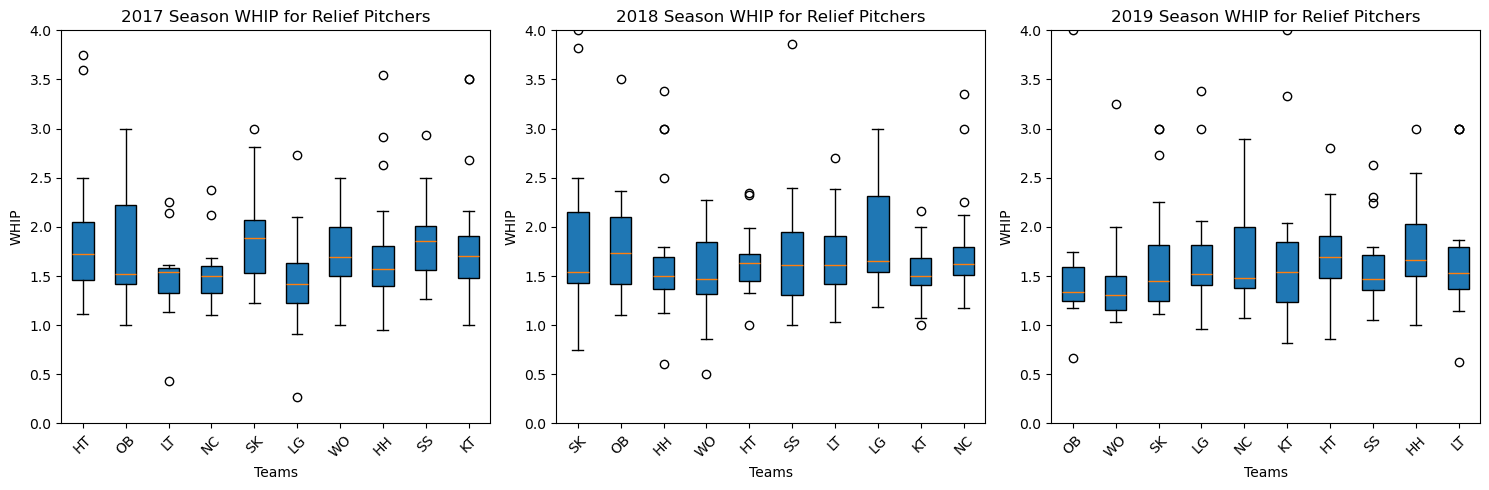

In [61]:
# 각 연도별 중계투수의 WHIP 데이터를 저장할 딕셔너리
whip_boxplot_data = {year: [] for year in [2017, 2018, 2019]}

for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        # 각 팀의 중계투수 명단을 가져옴
        team_pitchers = reliefPitcher[year].get(team_abbr)
        if team_pitchers is not None:
            # 해당 팀의 중계투수들의 WHIP 정보를 가져옴
            team_whip_values = pitcherDetailedRecords.loc[
                (pitcherDetailedRecords['연도'] == year) &
                (pitcherDetailedRecords['팀'] == team_abbr) &
                (pitcherDetailedRecords['name'].isin(team_pitchers['투수명']))
            ]['WHIP'].dropna()
            whip_boxplot_data[year].append(team_whip_values)
        else:
            # 해당 팀의 데이터가 없을 경우 빈 리스트 추가
            whip_boxplot_data[year].append([])

# 연도별 WHIP 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_ylim(0, 4)
axes[1].set_ylim(0, 4)
axes[2].set_ylim(0, 4)
for idx, year in enumerate([2017, 2018, 2019]):
    # 박스플롯의 patch_artist=True 옵션을 사용하여 박스의 색을 채움
    bp = axes[idx].boxplot(whip_boxplot_data[year], labels=rankings[year], patch_artist=True)

    # 박스플롯의 타이틀, 라벨 등 설정
    axes[idx].set_title(f'{year} Season WHIP for Relief Pitchers')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('WHIP')
    axes[idx].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jungwoo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

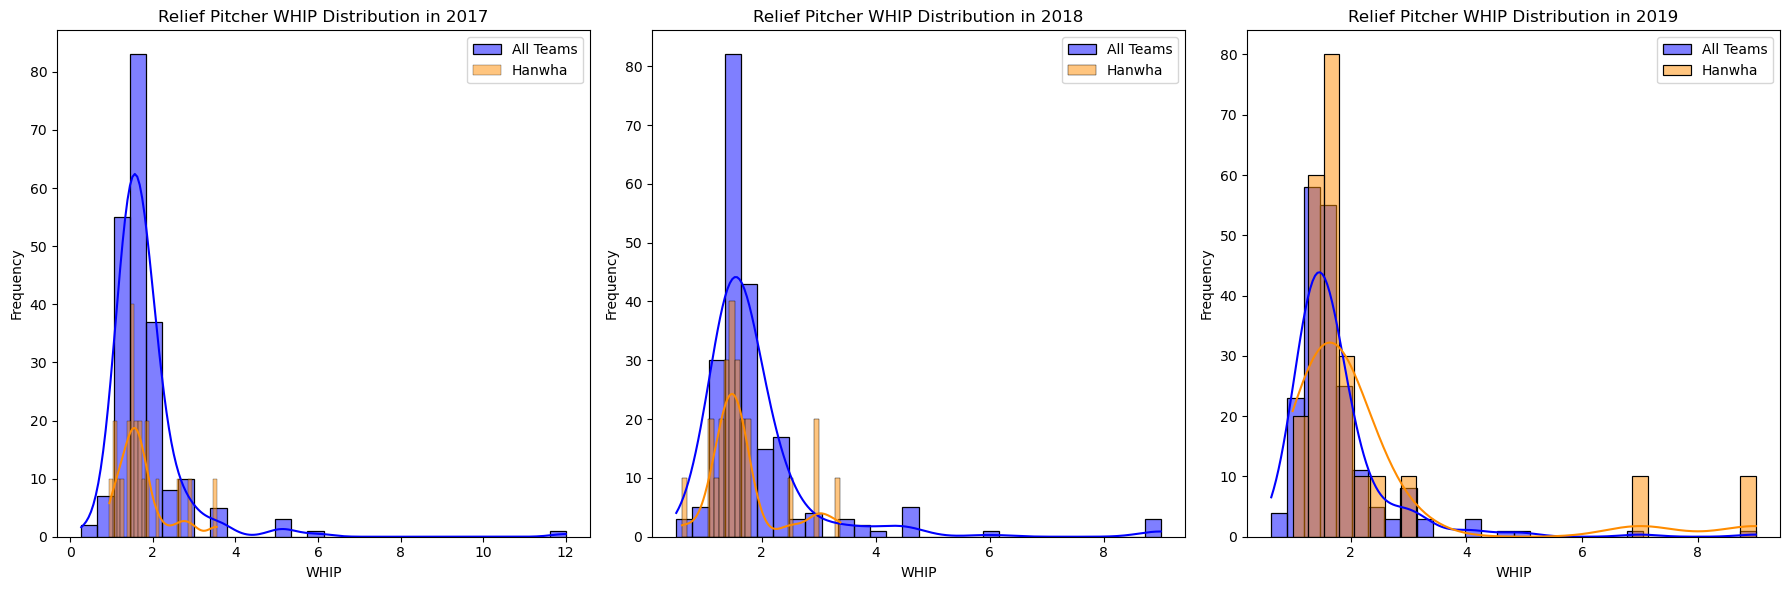

In [65]:
# 각 연도별 중계투수(RP)의 WHIP 데이터를 수집하고 히스토그램 및 KDE 그래프 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, year in enumerate([2017, 2018, 2019]):
    # 모든 팀과 한화 팀의 중계투수 WHIP 데이터 수집
    all_whip = []
    hh_whip = []  # 한화 팀의 중계투수 WHIP 데이터
    for team_abbr in team_abbr_list:
        team_data = pitcherDetailedRecords[(pitcherDetailedRecords['연도'] == year) & 
                                           (pitcherDetailedRecords['팀'] == team_abbr) & 
                                           (pitcherDetailedRecords['name'].isin(reliefPitcher[year][team_abbr]['투수명']))]
        if 'WHIP' in team_data.columns:
            whip = team_data['WHIP'].dropna().tolist()
            all_whip.extend(whip)

            # 한화 팀 데이터 수집
            if team_abbr == 'HH':
                hh_whip.extend(whip)

    # 모든 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(all_whip, kde=True, bins=30, color="blue", ax=axes[idx], label="All Teams", common_norm=True)
    
    # 한화 팀에 대한 히스토그램과 KDE 그리기
    sns.histplot(hh_whip*10, kde=True, bins=30, color="darkorange", ax=axes[idx], label="Hanwha", common_norm=True)

    axes[idx].set_title(f'Relief Pitcher WHIP Distribution in {year}')
    axes[idx].set_xlabel('WHIP')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()


#### B2. K/BB

Year 2017:
  Mean K/BB Ratio: 1.97
  Median (2nd Quartile): 1.93
  1st Quartile: 1.12
  3rd Quartile: 2.45
---------------
Year 2018:
  Mean K/BB Ratio: 2.22
  Median (2nd Quartile): 2.00
  1st Quartile: 1.65
  3rd Quartile: 2.73
---------------
Year 2019:
  Mean K/BB Ratio: 1.83
  Median (2nd Quartile): 1.33
  1st Quartile: 0.96
  3rd Quartile: 2.37
---------------


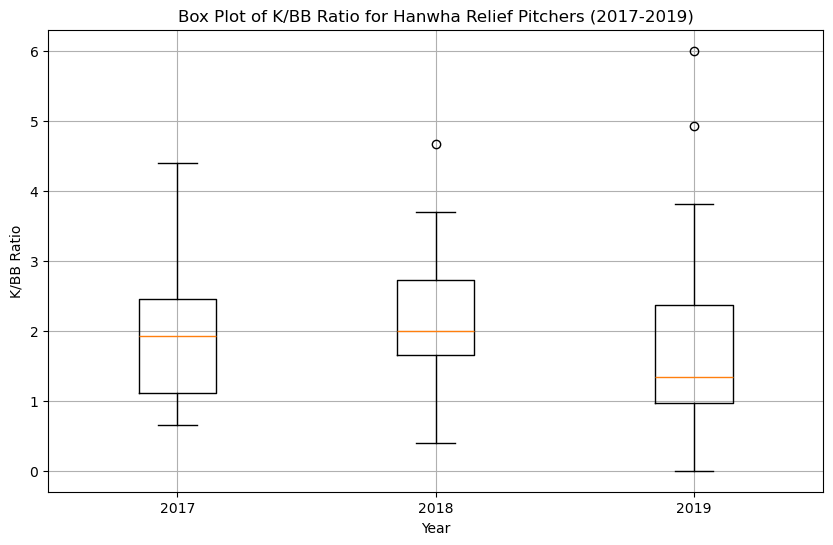

(None,
 [(1.9734426830781846,
   1.9285714285714286,
   1.1153846153846154,
   2.4545454545454546),
  (2.2193412732128253, 2.0, 1.6470006591957813, 2.725),
  (1.8328580417497022,
   1.3333333333333333,
   0.9642857142857143,
   2.3666666666666667)])

In [70]:
# 각 연도별 한화 이글스 중계투수의 볼넷 대비 삼진비를 계산

k_bb_ratio_data = []
summaries = []

for year in [2017, 2018, 2019]:
    # 해당 연도의 한화 이글스 중계투수 이름 가져오기
    hh_relief_pitchers = reliefPitcher[year]['HH']['투수명'].dropna().tolist()

    # 중계투수들의 삼진(K)과 볼넷(BB) 데이터 가져오기
    pitcher_data = pitcherDetailedRecords[
        (pitcherDetailedRecords['연도'] == year) & 
        (pitcherDetailedRecords['팀'] == 'HH') & 
        (pitcherDetailedRecords['name'].isin(hh_relief_pitchers))
    ]

    # 삼진 대비 볼넷 비율 계산 (K/BB)
    k_bb_ratio = pitcher_data['삼진'] / pitcher_data['볼넷']
    k_bb_ratio = k_bb_ratio.replace([np.inf, -np.inf], np.nan).dropna()  # 무한대 값을 제거하고 NaN 값 제거
    k_bb_ratio_data.append(k_bb_ratio)

    # 평균, 중앙값, 1사분위수, 3사분위수 계산
    mean = np.mean(k_bb_ratio)
    median = np.median(k_bb_ratio)
    q1 = np.percentile(k_bb_ratio, 25)
    q3 = np.percentile(k_bb_ratio, 75)
    
    summaries.append((mean, median, q1, q3))

    print(f"Year {year}:")
    print(f"  Mean K/BB Ratio: {mean:.2f}")
    print(f"  Median (2nd Quartile): {median:.2f}")
    print(f"  1st Quartile: {q1:.2f}")
    print(f"  3rd Quartile: {q3:.2f}")
    print('---------------')

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(k_bb_ratio_data, labels=['2017', '2018', '2019'])

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot of K/BB Ratio for Hanwha Relief Pitchers (2017-2019)')
plt.xlabel('Year')
plt.ylabel('K/BB Ratio')

# 그래프 표시
plt.grid(True)
plt.show(), summaries


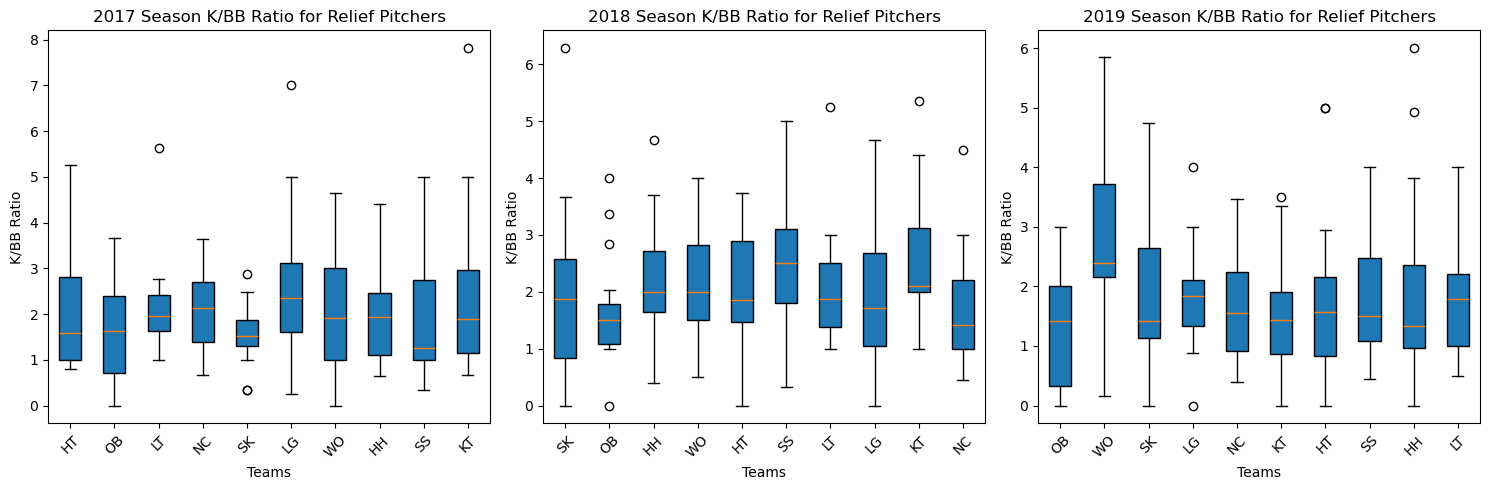

In [71]:
# 각 연도별 중계투수의 삼진 대비 볼넷 비율 (K/BB) 데이터를 저장할 딕셔너리
k_bb_boxplot_data = {year: [] for year in [2017, 2018, 2019]}

for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        # 각 팀의 중계투수 명단을 가져옴
        team_pitchers = reliefPitcher[year].get(team_abbr)
        if team_pitchers is not None:
            # 해당 팀의 중계투수들의 삼진(K)과 볼넷(BB) 데이터 가져오기
            team_pitcher_data = pitcherDetailedRecords.loc[
                (pitcherDetailedRecords['연도'] == year) &
                (pitcherDetailedRecords['팀'] == team_abbr) &
                (pitcherDetailedRecords['name'].isin(team_pitchers['투수명']))
            ]
            k_bb_ratio = team_pitcher_data['삼진'] / team_pitcher_data['볼넷']
            k_bb_ratio = k_bb_ratio.replace([np.inf, -np.inf], np.nan).dropna()  # 무한대 값을 제거하고 NaN 값 제거
            k_bb_boxplot_data[year].append(k_bb_ratio)
        else:
            # 해당 팀의 데이터가 없을 경우 빈 리스트 추가
            k_bb_boxplot_data[year].append([])

# 연도별 K/BB 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, year in enumerate([2017, 2018, 2019]):
    # 박스플롯의 patch_artist=True 옵션을 사용하여 박스의 색을 채움
    bp = axes[idx].boxplot(k_bb_boxplot_data[year], labels=rankings[year], patch_artist=True)

    # 박스플롯의 타이틀, 라벨 등 설정
    axes[idx].set_title(f'{year} Season K/BB Ratio for Relief Pitchers')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('K/BB Ratio')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### B3. FIP

Year 2017:
  Mean FIP: 5.70
  Median (2nd Quartile): 5.20
  1st Quartile: 4.43
  3rd Quartile: 6.52
---------------
Year 2018:
  Mean FIP: 6.40
  Median (2nd Quartile): 5.50
  1st Quartile: 4.78
  3rd Quartile: 6.62
---------------
Year 2019:
  Mean FIP: 5.19
  Median (2nd Quartile): 4.54
  1st Quartile: 3.80
  3rd Quartile: 5.70
---------------


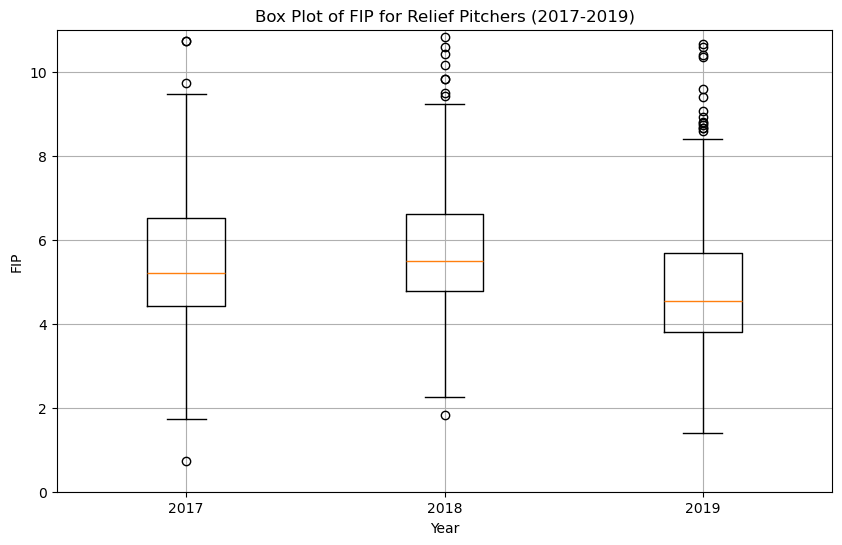

(None,
 [(5.695345622119815, 5.2, 4.43, 6.52),
  (6.40351598173516, 5.5, 4.775, 6.62),
  (5.188009708737864, 4.535, 3.8024999999999998, 5.695)])

In [80]:
# 각 연도별 중계투수의 WHIP 데이터를 저장할 리스트
whip_data = []
summaries = []

for year in [2017, 2018, 2019]:
    # 해당 연도의 모든 팀의 중계투수 이름 가져오기
    relief_pitchers = []
    for team_abbr in team_abbr_list:
        relief_pitchers.extend(reliefPitcher[year][team_abbr]['투수명'].dropna().tolist())

    # 중계투수들의 WHIP 데이터 가져오기
    whip = pitcherDetailedRecords[
        (pitcherDetailedRecords['연도'] == year) & 
        (pitcherDetailedRecords['name'].isin(relief_pitchers))
    ]['FIP']

    # NaN 값 제거
    whip = whip.dropna()
    whip_data.append(whip)

    # 평균, 중앙값, 1사분위수, 3사분위수 계산
    mean = np.mean(whip)
    median = np.median(whip)
    q1 = np.percentile(whip, 25)
    q3 = np.percentile(whip, 75)
    
    summaries.append((mean, median, q1, q3))

    print(f"Year {year}:")
    print(f"  Mean FIP: {mean:.2f}")
    print(f"  Median (2nd Quartile): {median:.2f}")
    print(f"  1st Quartile: {q1:.2f}")
    print(f"  3rd Quartile: {q3:.2f}")
    print('---------------')

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(whip_data, labels=['2017', '2018', '2019'])

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot of FIP for Relief Pitchers (2017-2019)')
plt.xlabel('Year')
plt.ylabel('FIP')
plt.ylim(0, 11)  # WHIP 값의 범위 설정

# 그래프 표시
plt.grid(True)
plt.show(), summaries

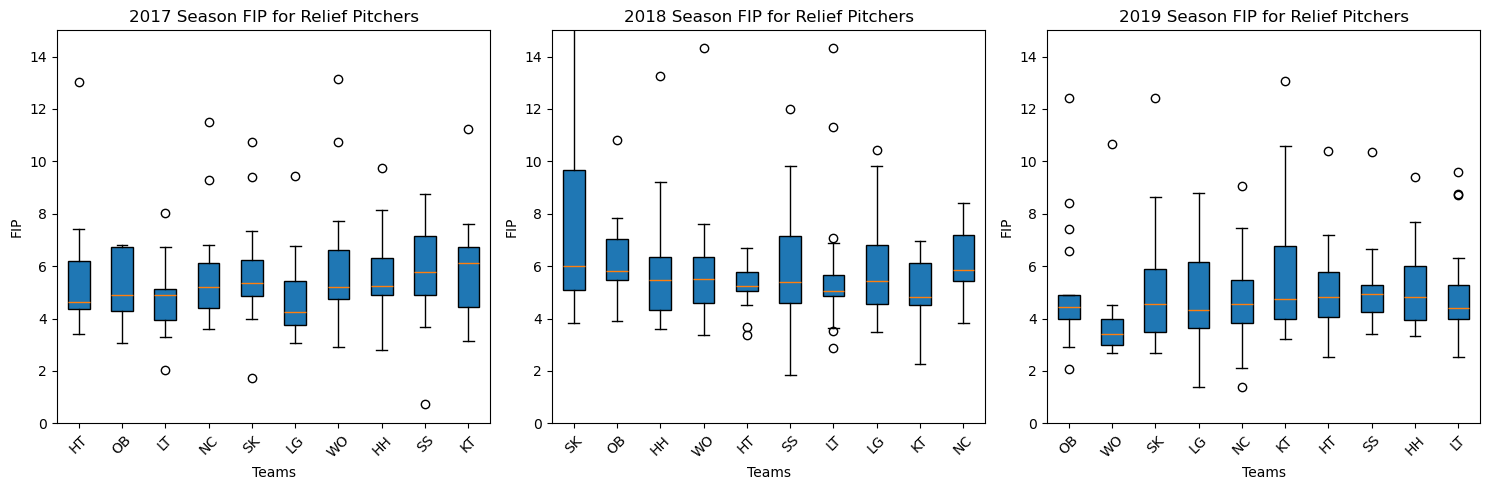

In [82]:
# 각 연도별 중계투수의 WHIP 데이터를 저장할 딕셔너리
whip_boxplot_data = {year: [] for year in [2017, 2018, 2019]}

for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        # 각 팀의 중계투수 명단을 가져옴
        team_pitchers = reliefPitcher[year].get(team_abbr)
        if team_pitchers is not None:
            # 해당 팀의 중계투수들의 WHIP 정보를 가져옴
            team_whip_values = pitcherDetailedRecords.loc[
                (pitcherDetailedRecords['연도'] == year) &
                (pitcherDetailedRecords['팀'] == team_abbr) &
                (pitcherDetailedRecords['name'].isin(team_pitchers['투수명']))
            ]['FIP'].dropna()
            whip_boxplot_data[year].append(team_whip_values)
        else:
            # 해당 팀의 데이터가 없을 경우 빈 리스트 추가
            whip_boxplot_data[year].append([])

# 연도별 WHIP 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_ylim(0, 15)
axes[1].set_ylim(0, 15)
axes[2].set_ylim(0, 15)
for idx, year in enumerate([2017, 2018, 2019]):
    # 박스플롯의 patch_artist=True 옵션을 사용하여 박스의 색을 채움
    bp = axes[idx].boxplot(whip_boxplot_data[year], labels=rankings[year], patch_artist=True)

    # 박스플롯의 타이틀, 라벨 등 설정
    axes[idx].set_title(f'{year} Season FIP for Relief Pitchers')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('FIP')
    axes[idx].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

### 타자

In [88]:
# 각 연도별 타자 데이터를 저장할 딕셔너리
hitter = {
    2017: {team_abbr: pd.DataFrame() for team_abbr in team_abbr_list},
    2018: {team_abbr: pd.DataFrame() for team_abbr in team_abbr_list},
    2019: {team_abbr: pd.DataFrame() for team_abbr in team_abbr_list}
}

# 각 팀의 타자 데이터 추출
for year in [2017, 2018, 2019]:
    for team_abbr in team_abbr_list:
        match_data = globals()[f'{team_abbr}Match{year}']
        for _, row in match_data.iterrows():
            matchid = row['matchID']
            team_part = matchid[8:]
            away_team = team_part[:2]

            if away_team == team_abbr:
                team_hitters = globals()[f'hitter{year}'][(globals()[f'hitter{year}']['matchid'] == matchid) & (globals()[f'hitter{year}']['경기장'] == '원정')]
            else:
                team_hitters = globals()[f'hitter{year}'][(globals()[f'hitter{year}']['matchid'] == matchid) & (globals()[f'hitter{year}']['경기장'] == '홈')]

            # 타자 데이터를 팀별 데이터프레임에 추가
            if not team_hitters.empty:
                hitter[year][team_abbr] = pd.concat([hitter[year][team_abbr], team_hitters], ignore_index=True)

# 결과 확인
print(hitter[2018]['HH'].head())


   Unnamed: 0  타자명  타수  득점  안타  타점  홈런  볼넷  삼진    타율    연도  월   일 소속팀 상대팀 경기장  \
0       12276  이용규   5   0   1   1   0   0   2  0.20  2018  3  24  WO  HH  원정   
1       12277  양성우   5   0   1   0   0   0   0  0.20  2018  3  24  WO  HH  원정   
2       12278  송광민   4   1   2   0   0   0   1  0.50  2018  3  24  WO  HH  원정   
3       12279  김태균   4   0   3   0   0   0   1  0.75  2018  3  24  WO  HH  원정   
4       12280  이동훈   0   0   0   0   0   0   0  0.00  2018  3  24  WO  HH  원정   

             matchid  
0  20180324HHWO02018  
1  20180324HHWO02018  
2  20180324HHWO02018  
3  20180324HHWO02018  
4  20180324HHWO02018  


In [89]:
# 결과 확인
print(hitter[2018]['HH'])

      Unnamed: 0  타자명  타수  득점  안타  타점  홈런  볼넷  삼진     타율    연도   월   일 소속팀  \
0          12276  이용규   5   0   1   1   0   0   2  0.200  2018   3  24  WO   
1          12277  양성우   5   0   1   0   0   0   0  0.200  2018   3  24  WO   
2          12278  송광민   4   1   2   0   0   0   1  0.500  2018   3  24  WO   
3          12279  김태균   4   0   3   0   0   0   1  0.750  2018   3  24  WO   
4          12280  이동훈   0   0   0   0   0   0   0  0.000  2018   3  24  WO   
...          ...  ...  ..  ..  ..  ..  ..  ..  ..    ...   ...  ..  ..  ..   
1759        9037  최진행   1   0   0   0   0   0   0  0.213  2018  10  13  HH   
1760        9038  하주석   4   2   2   1   0   0   0  0.254  2018  10  13  HH   
1761        9039  김회성   2   3   1   2   1   2   1  0.259  2018  10  13  HH   
1762        9040  정은원   4   2   2   0   0   0   0  0.249  2018  10  13  HH   
1763        9041  최재훈   4   0   2   2   0   0   0  0.262  2018  10  13  HH   

     상대팀 경기장            matchid  
0     HH  원정  20180324HHWO020

Year 2017:
  Mean Batting Average: 0.281
  Median (2nd Quartile): 0.282
  1st Quartile: 0.257
  3rd Quartile: 0.307
---------------
Year 2018:
  Mean Batting Average: 0.280
  Median (2nd Quartile): 0.279
  1st Quartile: 0.254
  3rd Quartile: 0.310
---------------
Year 2019:
  Mean Batting Average: 0.264
  Median (2nd Quartile): 0.265
  1st Quartile: 0.241
  3rd Quartile: 0.290
---------------


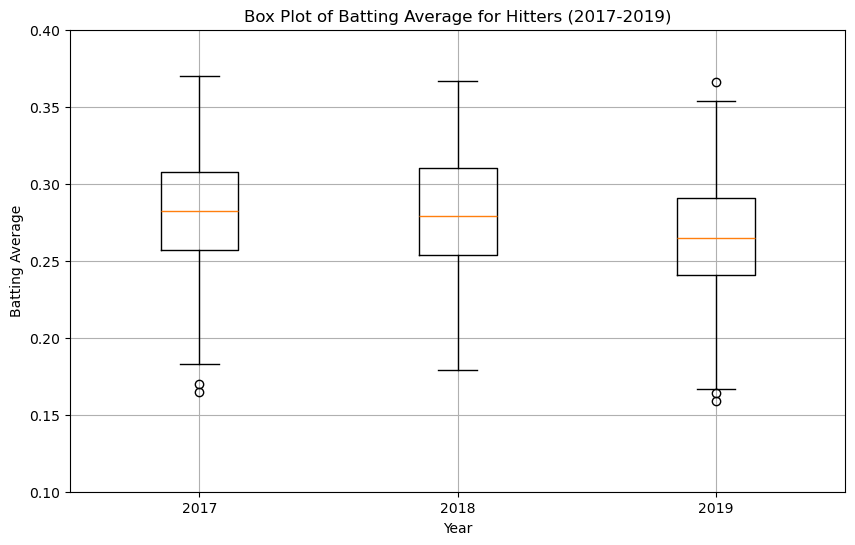

(None,
 [(0.2805723270440251, 0.282, 0.257, 0.3075),
  (0.2802430555555555, 0.279, 0.254, 0.31025),
  (0.263568345323741, 0.265, 0.241, 0.2905)])

In [98]:
# 각 연도별 타자들의 타율 데이터를 저장할 리스트
batting_average_data = []
summaries = []

for year in [2017, 2018, 2019]:
    # 해당 연도의 모든 팀의 타자 이름 가져오기
    hitters = []
    for team_abbr in team_abbr_list:
        team_hitters = hitter[year][team_abbr]['타자명'].dropna().tolist()
        hitters.extend(team_hitters)

    # 타자들의 타율 데이터 가져오기 (100타석 이상)
    batting_average = hitterDetailedRecords[
        (hitterDetailedRecords['연도'] == year) & 
        (hitterDetailedRecords['name'].isin(hitters)) &
        (hitterDetailedRecords['타석'] >= 100)  # 100타석 이상 조건 추가
    ]['타율']

    # NaN 값 제거
    batting_average = batting_average.dropna()
    batting_average_data.append(batting_average)

    # 평균, 중앙값, 1사분위수, 3사분위수 계산
    mean = np.mean(batting_average)
    median = np.median(batting_average)
    q1 = np.percentile(batting_average, 25)
    q3 = np.percentile(batting_average, 75)
    
    summaries.append((mean, median, q1, q3))

    print(f"Year {year}:")
    print(f"  Mean Batting Average: {mean:.3f}")
    print(f"  Median (2nd Quartile): {median:.3f}")
    print(f"  1st Quartile: {q1:.3f}")
    print(f"  3rd Quartile: {q3:.3f}")
    print('---------------')

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(batting_average_data, labels=['2017', '2018', '2019'])

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot of Batting Average for Hitters (2017-2019)')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.ylim(0.1, 0.4)  # 타율 값의 범위 설정

# 그래프 표시
plt.grid(True)
plt.show(), summaries


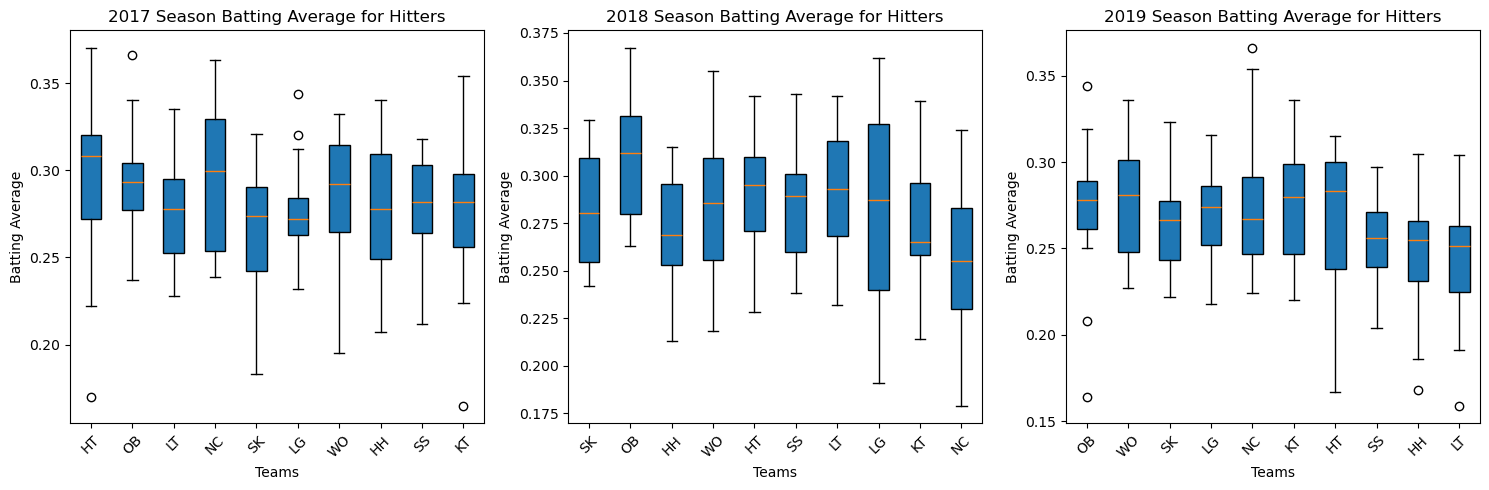

In [102]:
# 각 연도별 타자의 타율 데이터를 저장할 딕셔너리 (100타석 이상의 타자만 포함)
batting_average_boxplot_data = {year: [] for year in [2017, 2018, 2019]}

for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        # 해당 팀의 타자 명단을 가져옴
        team_hitters = hitter[year].get(team_abbr)
        if team_hitters is not None:
            # 해당 팀의 타자들의 타율 정보를 가져옴 (100타석 이상)
            team_batting_average_values = hitterDetailedRecords.loc[
                (hitterDetailedRecords['연도'] == year) &
                (hitterDetailedRecords['팀'] == team_abbr) &
                (hitterDetailedRecords['타석'] >= 100)  # 100타석 이상 조건 추가
            ]['타율'].dropna()
            batting_average_boxplot_data[year].append(team_batting_average_values)
        else:
            # 해당 팀의 데이터가 없을 경우 빈 리스트 추가
            batting_average_boxplot_data[year].append([])

# 연도별 타율 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, year in enumerate([2017, 2018, 2019]):
    # 박스플롯의 patch_artist=True 옵션을 사용하여 박스의 색을 채움
    bp = axes[idx].boxplot(batting_average_boxplot_data[year], labels=rankings[year], patch_artist=True)

    # 박스플롯의 타이틀, 라벨 등 설정
    axes[idx].set_title(f'{year} Season Batting Average for Hitters')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('Batting Average')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Year 2017:
  Mean OPS Average: 0.773
  Median (2nd Quartile): 0.770
  1st Quartile: 0.685
  3rd Quartile: 0.845
---------------
Year 2018:
  Mean OPS Average: 0.778
  Median (2nd Quartile): 0.787
  1st Quartile: 0.691
  3rd Quartile: 0.856
---------------
Year 2019:
  Mean OPS Average: 0.709
  Median (2nd Quartile): 0.705
  1st Quartile: 0.621
  3rd Quartile: 0.782
---------------


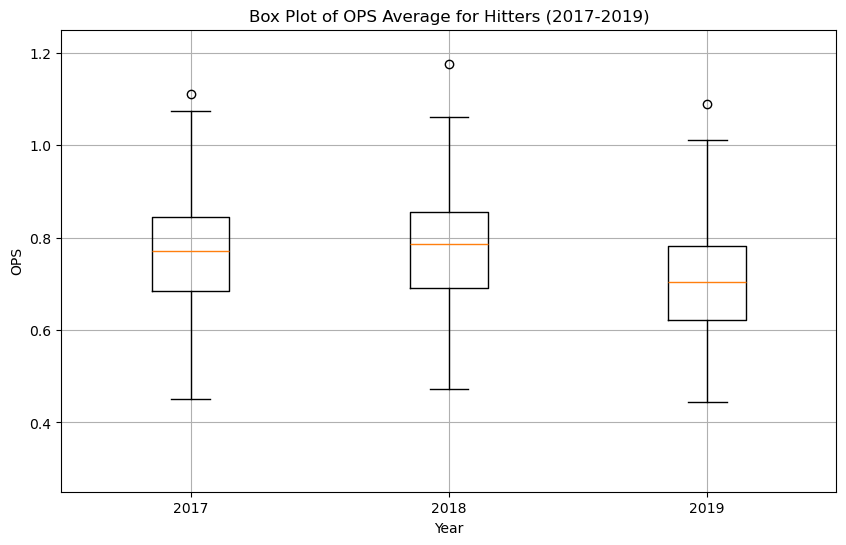

(None,
 [(0.7734025157232705, 0.77, 0.6855, 0.845),
  (0.778451388888889, 0.787, 0.6912499999999999, 0.85625),
  (0.709201438848921, 0.705, 0.6214999999999999, 0.782)])

In [106]:
# 각 연도별 타자들의 타율 데이터를 저장할 리스트
batting_average_data = []
summaries = []

for year in [2017, 2018, 2019]:
    # 해당 연도의 모든 팀의 타자 이름 가져오기
    hitters = []
    for team_abbr in team_abbr_list:
        team_hitters = hitter[year][team_abbr]['타자명'].dropna().tolist()
        hitters.extend(team_hitters)

    # 타자들의 타율 데이터 가져오기 (100타석 이상)
    batting_average = hitterDetailedRecords[
        (hitterDetailedRecords['연도'] == year) & 
        (hitterDetailedRecords['name'].isin(hitters)) &
        (hitterDetailedRecords['타석'] >= 100)  # 100타석 이상 조건 추가
    ]['OPS']

    # NaN 값 제거
    batting_average = batting_average.dropna()
    batting_average_data.append(batting_average)

    # 평균, 중앙값, 1사분위수, 3사분위수 계산
    mean = np.mean(batting_average)
    median = np.median(batting_average)
    q1 = np.percentile(batting_average, 25)
    q3 = np.percentile(batting_average, 75)
    
    summaries.append((mean, median, q1, q3))

    print(f"Year {year}:")
    print(f"  Mean OPS Average: {mean:.3f}")
    print(f"  Median (2nd Quartile): {median:.3f}")
    print(f"  1st Quartile: {q1:.3f}")
    print(f"  3rd Quartile: {q3:.3f}")
    print('---------------')

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(batting_average_data, labels=['2017', '2018', '2019'])

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot of OPS Average for Hitters (2017-2019)')
plt.xlabel('Year')
plt.ylabel('OPS')
plt.ylim(0.25, 1.25)  # 타율 값의 범위 설정

# 그래프 표시
plt.grid(True)
plt.show(), summaries


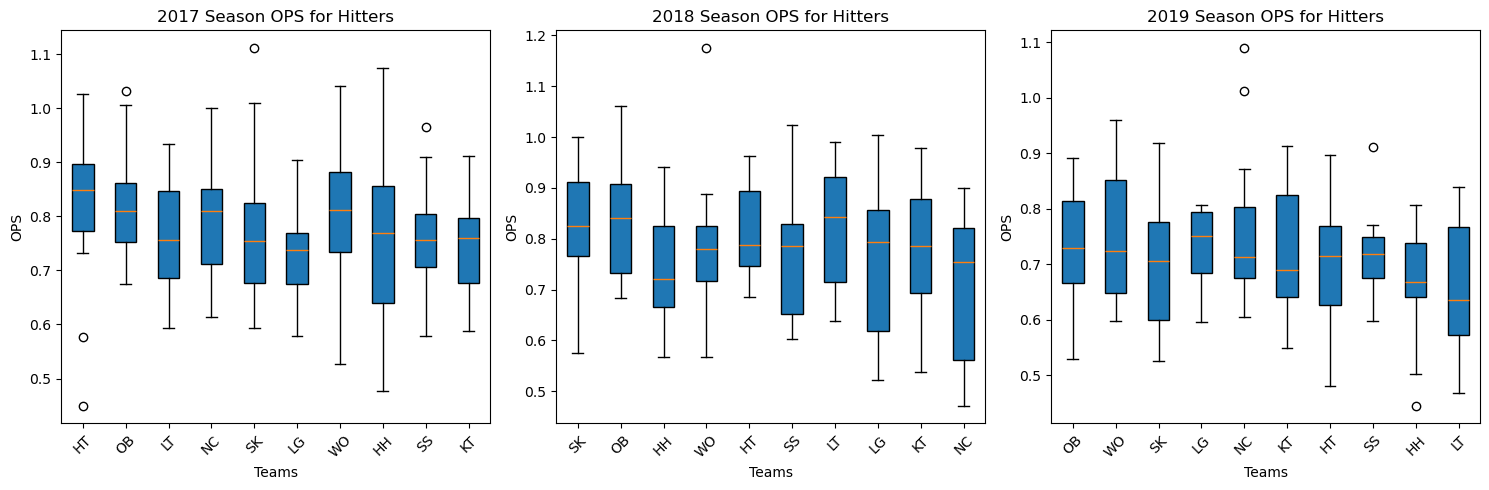

In [107]:
# 각 연도별 타자의 타율 데이터를 저장할 딕셔너리 (100타석 이상의 타자만 포함)
batting_average_boxplot_data = {year: [] for year in [2017, 2018, 2019]}

for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        # 해당 팀의 타자 명단을 가져옴
        team_hitters = hitter[year].get(team_abbr)
        if team_hitters is not None:
            # 해당 팀의 타자들의 타율 정보를 가져옴 (100타석 이상)
            team_batting_average_values = hitterDetailedRecords.loc[
                (hitterDetailedRecords['연도'] == year) &
                (hitterDetailedRecords['팀'] == team_abbr) &
                (hitterDetailedRecords['타석'] >= 100)  # 100타석 이상 조건 추가
            ]['OPS'].dropna()
            batting_average_boxplot_data[year].append(team_batting_average_values)
        else:
            # 해당 팀의 데이터가 없을 경우 빈 리스트 추가
            batting_average_boxplot_data[year].append([])

# 연도별 타율 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, year in enumerate([2017, 2018, 2019]):
    # 박스플롯의 patch_artist=True 옵션을 사용하여 박스의 색을 채움
    bp = axes[idx].boxplot(batting_average_boxplot_data[year], labels=rankings[year], patch_artist=True)

    # 박스플롯의 타이틀, 라벨 등 설정
    axes[idx].set_title(f'{year} Season OPS for Hitters')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('OPS')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Year 2017:
  Mean OPS Average: 95.58
  Median (2nd Quartile): 95.30
  1st Quartile: 72.20
  3rd Quartile: 115.05
---------------
Year 2018:
  Mean OPS Average: 94.34
  Median (2nd Quartile): 95.95
  1st Quartile: 71.40
  3rd Quartile: 115.85
---------------
Year 2019:
  Mean OPS Average: 96.13
  Median (2nd Quartile): 94.60
  1st Quartile: 73.45
  3rd Quartile: 118.35
---------------


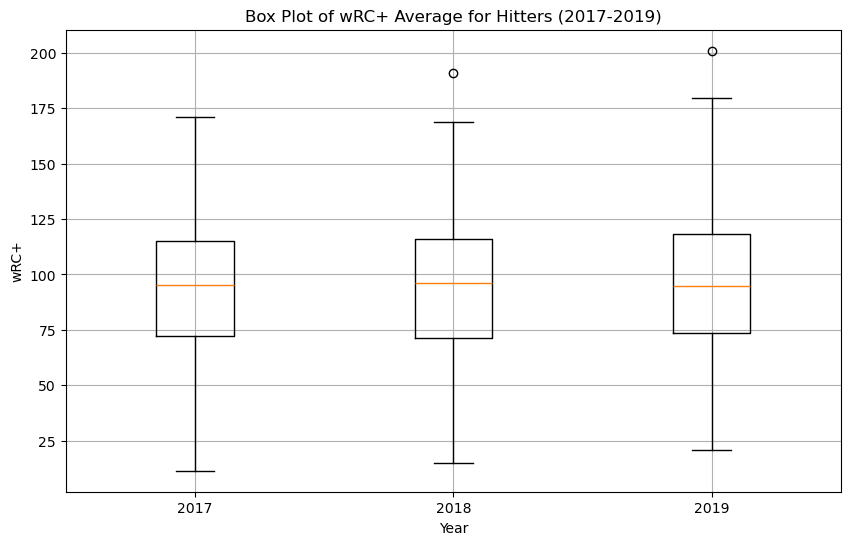

(None,
 [(95.57987421383648, 95.3, 72.2, 115.05),
  (94.33819444444445, 95.94999999999999, 71.4, 115.85),
  (96.1338129496403, 94.6, 73.45, 118.35)])

In [114]:
# 각 연도별 타자들의 타율 데이터를 저장할 리스트
batting_average_data = []
summaries = []

for year in [2017, 2018, 2019]:
    # 해당 연도의 모든 팀의 타자 이름 가져오기
    hitters = []
    for team_abbr in team_abbr_list:
        team_hitters = hitter[year][team_abbr]['타자명'].dropna().tolist()
        hitters.extend(team_hitters)

    # 타자들의 타율 데이터 가져오기 (100타석 이상)
    batting_average = hitterDetailedRecords[
        (hitterDetailedRecords['연도'] == year) & 
        (hitterDetailedRecords['name'].isin(hitters)) &
        (hitterDetailedRecords['타석'] >= 100)  # 100타석 이상 조건 추가
    ]['wRC+']

    # NaN 값 제거
    batting_average = batting_average.dropna()
    batting_average_data.append(batting_average)

    # 평균, 중앙값, 1사분위수, 3사분위수 계산
    mean = np.mean(batting_average)
    median = np.median(batting_average)
    q1 = np.percentile(batting_average, 25)
    q3 = np.percentile(batting_average, 75)
    
    summaries.append((mean, median, q1, q3))

    print(f"Year {year}:")
    print(f"  Mean OPS Average: {mean:.2f}")
    print(f"  Median (2nd Quartile): {median:.2f}")
    print(f"  1st Quartile: {q1:.2f}")
    print(f"  3rd Quartile: {q3:.2f}")
    print('---------------')

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
plt.boxplot(batting_average_data, labels=['2017', '2018', '2019'])

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot of wRC+ Average for Hitters (2017-2019)')
plt.xlabel('Year')
plt.ylabel('wRC+')
#plt.ylim(25, 200)  # 타율 값의 범위 설정

# 그래프 표시
plt.grid(True)
plt.show(), summaries


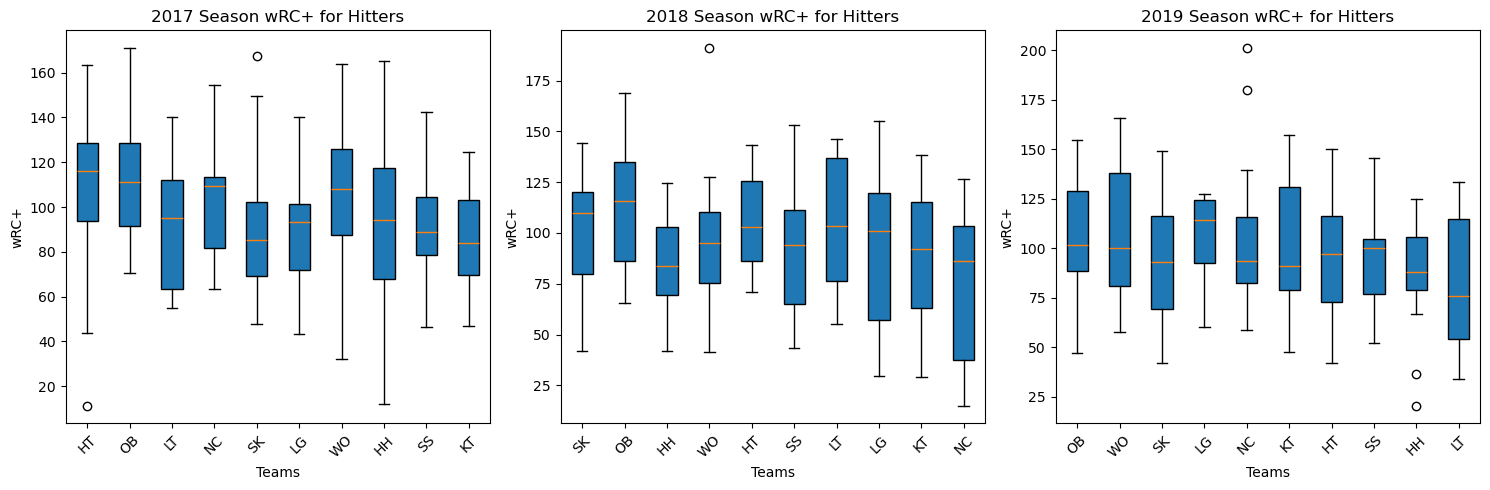

In [115]:
# 각 연도별 타자의 타율 데이터를 저장할 딕셔너리 (100타석 이상의 타자만 포함)
batting_average_boxplot_data = {year: [] for year in [2017, 2018, 2019]}

for year in [2017, 2018, 2019]:
    for team_abbr in rankings[year]:
        # 해당 팀의 타자 명단을 가져옴
        team_hitters = hitter[year].get(team_abbr)
        if team_hitters is not None:
            # 해당 팀의 타자들의 타율 정보를 가져옴 (100타석 이상)
            team_batting_average_values = hitterDetailedRecords.loc[
                (hitterDetailedRecords['연도'] == year) &
                (hitterDetailedRecords['팀'] == team_abbr) &
                (hitterDetailedRecords['타석'] >= 100)  # 100타석 이상 조건 추가
            ]['wRC+'].dropna()
            batting_average_boxplot_data[year].append(team_batting_average_values)
        else:
            # 해당 팀의 데이터가 없을 경우 빈 리스트 추가
            batting_average_boxplot_data[year].append([])

# 연도별 타율 박스 플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, year in enumerate([2017, 2018, 2019]):
    # 박스플롯의 patch_artist=True 옵션을 사용하여 박스의 색을 채움
    bp = axes[idx].boxplot(batting_average_boxplot_data[year], labels=rankings[year], patch_artist=True)

    # 박스플롯의 타이틀, 라벨 등 설정
    axes[idx].set_title(f'{year} Season wRC+ for Hitters')
    axes[idx].set_xlabel('Teams')
    axes[idx].set_ylabel('wRC+')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()